In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import Package

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Project Dibimbing - Hudzaifah Rizqi K/Final Project/hotel_booking.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


## Dataset Understanding

**Sumber Dataset:** https://www.kaggle.com/datasets/mojtaba142/hotel-booking

**Tentang Dataset:**

Dataset ini berisi 119390 observasi untuk Hotel Kota dan Hotel Resor. Setiap observasi mewakili pemesanan hotel antara tanggal 1 Juli 2015 dan 31 Agustus 2017, termasuk pemesanan yang benar-benar diterima dan pemesanan yang dibatalkan. Dataset ini adalah data hotel yang sebenarnya, semua elemen data yang berkaitan dengan identifikasi hotel atau pelanggan telah dihapus. Empat Kolom, 'nama', 'email', 'nomor telepon' dan 'kartu kredit' telah dibuat dan ditambahkan secara artifisial ke dalam dataset. Data ini aslinya berasal dari artikel Hotel Booking Demand Datasets, yang ditulis oleh Nuno Antonio, Ana Almeida, dan Luis Nunes untuk Data in Brief, Volume 22, Februari 2019.

**Penjelasan Kolom Dataset:**

0.   hotel                           : Kumpulan data berisi informasi pemesanan dua hotel. Salah satu hotel adalah hotel resor dan yang lainnya adalah hotel kota.
1.   is_canceled                     : Nilai yang menunjukkan apakah pemesanan dibatalkan (1) atau tidak (0).
2.   lead_time                       : Jumlah hari yang berlalu antara tanggal pemesanan yang dimasukkan ke PMS dan tanggal kedatangan.
3.   arrival_date_year               : Tahun tanggal kedatangan
4.   arrival_date_month              : Bulan tanggal kedatangan dengan 12 kategori (Januari hingga Desember)
5.   arrival_date_week_number        : Nomor minggu dari tanggal kedatangan (dalam satu tahun hingga 53 minggu)
6.   arrival_date_day_of_month       : Tanggal dalam bulan dari tanggal kedatangan (hingga 31 hari)
7.   stays_in_weekend_nights         : Jumlah malam akhir pekan (Sabtu atau Minggu) yang ditinggali tamu atau dipesan untuk menginap di hotel
8.   stays_in_week_nights            : Jumlah malam dalam seminggu (Senin hingga Jumat) yang ditinggali tamu atau dipesan untuk menginap di hotel BO dan BL/Dihitung dengan menghitung jumlah malam dalam seminggu
9.   adults                          : Jumlah orang dewasa
10.  children                        : Jumlah anak-anak
11.  babies                          : Jumlah bayi
12.  meal                            : BB-Bed dan Breakfast (jenis akomodasi yang menyediakan kamar untuk bermalam dan sarapan di pagi hari). B&B biasanya dikelola oleh keluarga atau tim kecil yang tinggal di lokasi tersebut.
13.  country                         : Negara asal customer
14.  market_segment                  : Penunjukan segmen pasar. Dalam kategori, istilah “TA” berarti “Agen Perjalanan” dan “TO” berarti “Operator Tur”
15.  distribution_channel            : Saluran distribusi pemesanan. Istilah “TA” berarti “Agen Perjalanan” dan “TO” berarti “Operator Tur”
16.  is_repeated_guest               : Nilai yang menunjukkan apakah nama pemesanan berasal dari tamu yang berulang (1) atau tidak (0)
17.  previous_cancellations          : Jumlah pemesanan sebelumnya yang dibatalkan oleh pelanggan sebelum pemesanan saat ini
18.  previous_bookings_not_canceled  : Jumlah pemesanan sebelumnya yang tidak dibatalkan oleh pelanggan sebelum pemesanan saat ini
19.  reserved_room_type              : Kode tipe kamar yang dipesan. Kode ditampilkan sebagai ganti penunjukan untuk alasan anonimitas
20.  assigned_room_type              : Kode untuk tipe kamar yang ditetapkan untuk pemesanan. Terkadang tipe kamar yang ditetapkan berbeda dari tipe kamar yang dipesan karena alasan operasional hotel (misalnya pemesanan berlebih) atau atas permintaan pelanggan. Kode disajikan sebagai ganti penunjukan demi alasan anonimitas
21.  booking_changes                 : Jumlah perubahan/amendemen yang dibuat pada pemesanan sejak pemesanan dimasukkan pada PMS (Property Management System) hingga saat check-in atau pembatalan
22.  deposit_type                    : 'No Deposit' - tidak ada deposit yang dibuat; 'Non Refund' - deposit dibuat dengan nilai total biaya menginap; 'Refundable' - deposit dibuat dengan nilai di bawah total biaya menginap.
23.  agent                           : ID agen perjalanan yang membuat pemesanan
24.  company                         : ID perusahaan/entitas yang membuat pemesanan atau yang bertanggung jawab untuk membayar pemesanan. ID disajikan sebagai ganti penunjukan demi alasan anonimitas
25.  days_in_waiting_list            : Jumlah hari pemesanan berada dalam daftar tunggu sebelum dikonfirmasi kepada pelanggan
26.  customer_type                   : 'Group' - saat pemesanan dikaitkan dengan grup; 'Transient' - saat pemesanan bukan bagian dari grup atau kontrak, dan tidak dikaitkan dengan pemesanan sementara lainnya; 'Transient-party' - saat pemesanan bersifat sementara, tetapi terkait dengan setidaknya pemesanan sementara lainnya
27.  adr                             : Tarif Harian Rata-rata (Dihitung dengan membagi jumlah semua transaksi penginapan dengan jumlah total malam menginap)
28.  required_car_parking_spaces     : Jumlah tempat parkir mobil yang dibutuhkan oleh pelanggan
29.  total_of_special_requests       : Jumlah permintaan khusus yang dibuat oleh pelanggan (misalnya tempat tidur twin atau lantai tinggi)
30.  reservation_status              : 'Check-Out' - pelanggan telah check-in tetapi sudah meninggalkan hotel; 'No-Show' - pelanggan tidak check-in dan tidak memberi tahu hotel tentang alasannya

31.  reservation_status_date         : Tanggal saat status terakhir ditetapkan. Variabel ini dapat digunakan bersama dengan ReservationStatus untuk mengetahui kapan pemesanan dibatalkan atau kapan pelanggan check-out dari hotel
32.  name                            : Nama customer (tidak asli)
33.  email                           : Email customer (tidak asli)
34.  phone-number                    : Nomor Telepon customer (tidak asli)
35.  credit_card                     : Nomor Kartu Kredit customer (tidak asli)


## Project Objectives (Goals)

Dalam dataset yang saya gunakan terdapat banyak sekali informasi yang bisa didapatkan dari hasil analisis baik melalui EDA, Feature Engineering maupun pembentukan model machine learning. Namun dalam pengerjaan ini saya ingin berfokus pada sebuah tujuan yakni:

- **Pernyataan Masalah:** Masalah yang ingin diselesaikan terkait dengan Pembatalan reservasi pelanggan hotel. Tujuan utama adalah meminimalkan jumlah pembatalan yang terjadi, sehingga dapat membantu meningkatkan tingkat hunian kamar dan pendapatan hotel.

- **Pihak yang terpengaruh:** Tentu dalam permasalan ini terdapat potensi beberapa pihak yang terpengaruh antara lain
  
  1. Hotel
  - Kerugian Finansial: Kamar yang kosong artinya kehilangan pendapatan potensial.
  - Efisiensi Operasional: Perubahan rencana operasional akibat pembatalan mendadak dapat mengganggu kinerja staf hotel dan meningkatkan biaya.
  - Tingkat Reputasi: Tingkat pembatalan yang tinggi dapat memengeruhi reputasi hotel dan mengurangi kepercayaan calon tamu.
  2. Tamu/Pelanggan
  - Ketidaknyamanan: Jika pembatalan dilakukan oleh pihak hotel (misal overbooking) dapat menyebabkan ketidaknyamanan pada tamu.
  - Kehilangan waktu: Tamu harus mencari alternatif akomodasi lainnya yang mungkin kesulitan dalam proses tersebut.
  3. Platform Reservasi
  - Penurunan pendapatan: Pembatalan dapat mengurangi komisi yang diterima dari transaksi melalui platfrom.
  - Kerusakan reputasi: Jika banyak hotel dalam platfrom memiliki tingkat pembatalan tinggi, maka dapat memengaruhi reputasi platfrom.

- **Skala masalah**
  1. Waktu/Musim: Adanya waktu/musim tertentu yang mungkin mengalami sepi tamu
  2. Lokasi: Terdapat keunggulan tersendiri dari masing-masing lokasi hotel baik dari
    - City Hotel yang terletak di pusat kota, biasanya di kota-kota besar. City hotel sering digunakan oleh para pebisnis dan dikenal sebagai hotel transit. Fasilitas yang ditawarkan biasanya menunjang para pebisnis seperti ruang rapat, meja kerja, dan lainnya atau
    - Resort Hotel yang terletak di kawasan wisata dan rekreasi. Resort hotel difungsikan untuk para wisatawan yang bertujuan berwisata. Resort hotel biasanya berlokasi jauh dari pusat kota dan menawarkan lebih banyak fasilitas untuk tamunya, termasuk pilihan restoran mewah, bar, klub malam dan kasino, layanan spa dan salon lengkap, dan toko ritel eksklusif.
  3. Kebijakan Pembatalan: Kebijakan yang terlalu ketat maupun terlalu fleksibel dapat memengeruhi tingkat pembatalan. Terutama untuk Resort Hotel yang lebih sering dipesan saat liburan daripada City Hotel yang biasanya hanya digunakan untuk transit dan dipesan secara langsung di hari menginap.

- **Mengapa penting untuk diselesaikan?** Dengan menyelesaikan/meminimalkan permasalan ini dapat membantu:
  - meningkatkan hunian kamar dan tingkat pendapatan,
  - membantu membentuk perencanaan yang efisien dan menekan biaya operasional,
  - meningkatkan kepuasan tamu dan mendorong loyalitas,
  - memperkuat keunggulan posisi kompetitif dengan mengelola insiden pembatalan dengan baik.

- **Tujuan Bisnis:** Membantu mengurangi potensi pembatalan reservasi hotel untuk bulan-bulan selanjutnya. Beberapa matrix evaluasi yang digunakan **(Lebih Prioritas)**:
  1. Accuracy: Mengukur proporsi prediksi yang benar secara keseluruhan. Namun, kurang relevan jika data tidak seimbang (misalnya, jumlah pembatalan jauh lebih sedikit).
  2. **Precision:** Mengukur proporsi prediksi positif (pembatalan) yang benar. Penting jika biaya false positive tinggi (misalnya, menawarkan insentif kepada tamu yang tidak akan membatalkan). Tingkat presisi yang tinggi membantu hotel menargetkan penawaran khusus kepada tamu yang benar-benar berisiko membatalkan, meningkatkan kemungkinan mereka untuk tetap melanjutkan reservasi. Hotel juga bisa mengalokasikan sumber daya layanan pelanggan secara lebih efisien, dengan fokus pada tamu yang paling membutuhkan perhatian.
  3. **Recall:** Mengukur proporsi data positif yang benar-benar diklasifikasikan sebagai positif. Penting jika biaya false negative tinggi (misalnya, tidak mengantisipasi pembatalan dan kehilangan pendapatan). Dengan recall yang tinggi, hotel dapat proaktif dalam mengidentifikasi dan mengatasi masalah yang mungkin menyebabkan tamu membatalkan reservasi, seperti masalah dengan kamar atau layanan. Hotel juga dapat lebih baik dalam mengelola kapasitas kamar, mengurangi risiko overbooking atau underbooking.
  4. F1-Score: Rata-rata harmonik dari precision dan recall. Memberikan keseimbangan antara precision dan recall.

## Data Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.shape

(119390, 36)

In [ ]:
numerical_columns = []
for x in df.columns:
    if df[x].dtype in ['int', 'float']:
        if x != 'EmployeeNumber':
            numerical_columns.append(x)

In [ ]:
# Mencari kolom data numerik
df_numerik = df[numerical_columns]
df_numerik.columns

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [ ]:
# Mencari kolom data non-numerik
df_non_numerik = df.select_dtypes(exclude=['number']).columns.tolist()
df_non_numerik

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date',
 'name',
 'email',
 'phone-number',
 'credit_card']

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### Missing Value

In [ ]:
df.isna().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


Karena dalam tujuan analisis ini tidak memerlukan kolom data 'agent' dan 'company' maka dapat didrop saja untuk keseluruhan kolom. Untuk kolom yang mengandung privasi seperti 'name','email','phone-number'dan'credit_card' saya biarkan karena mungkin ada pelanggan yang sama memesan meskipun menggunakan nama yang sama di tanggal yang berbeda (mengingat keempat kolom ini diubah dengan AI (dummy) jadi tidak bisa langsung dianggap sebagai data duplikat). Sedangkan untuk index yang terdapat missing value pada kolom 'children' dan 'country' dapat dihapus karena hanya sedikit saja informasi yang dihapus.

In [ ]:
df.drop(columns=['agent','company'], axis=1, inplace=True)
df.dropna(subset=['children'], inplace=True)

# Hitung modus
modus = df['country'].mode()[0]

# Isi nilai yang hilang dengan modus
df['country'].fillna(modus, inplace=True)

<ipython-input-11-1d7038991cc9>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna(modus, inplace=True)


In [ ]:
df.isna().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [ ]:
df.shape

(119386, 34)

### Duplicate Data

In [ ]:
df.duplicated().sum()

0

In [ ]:
df[df.duplicated(keep=False)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card


Saya menyimpulkan bahwa data duplikasi dihasilkan ketika seluruh baris kolom sama. Untuk perwakilan index saya menggunakan nama pelanggan atau data privasi lainnya dengan asumsi nama yang sama bisa memesan tanggal kedatangan yang berbeda (meskipun nantinya di cancel atau untuk orang lain) atau dalam tanggal tertentu bisa ada pemesanan dengan nama yang sama namun spesifikasi pemesannya dalam kolom fitur lainnya berbeda (bisa saja atas nama orang yang sama digunakan oleh pelanggan lain juga).

In [ ]:
df.shape

(119386, 34)

### Outliers

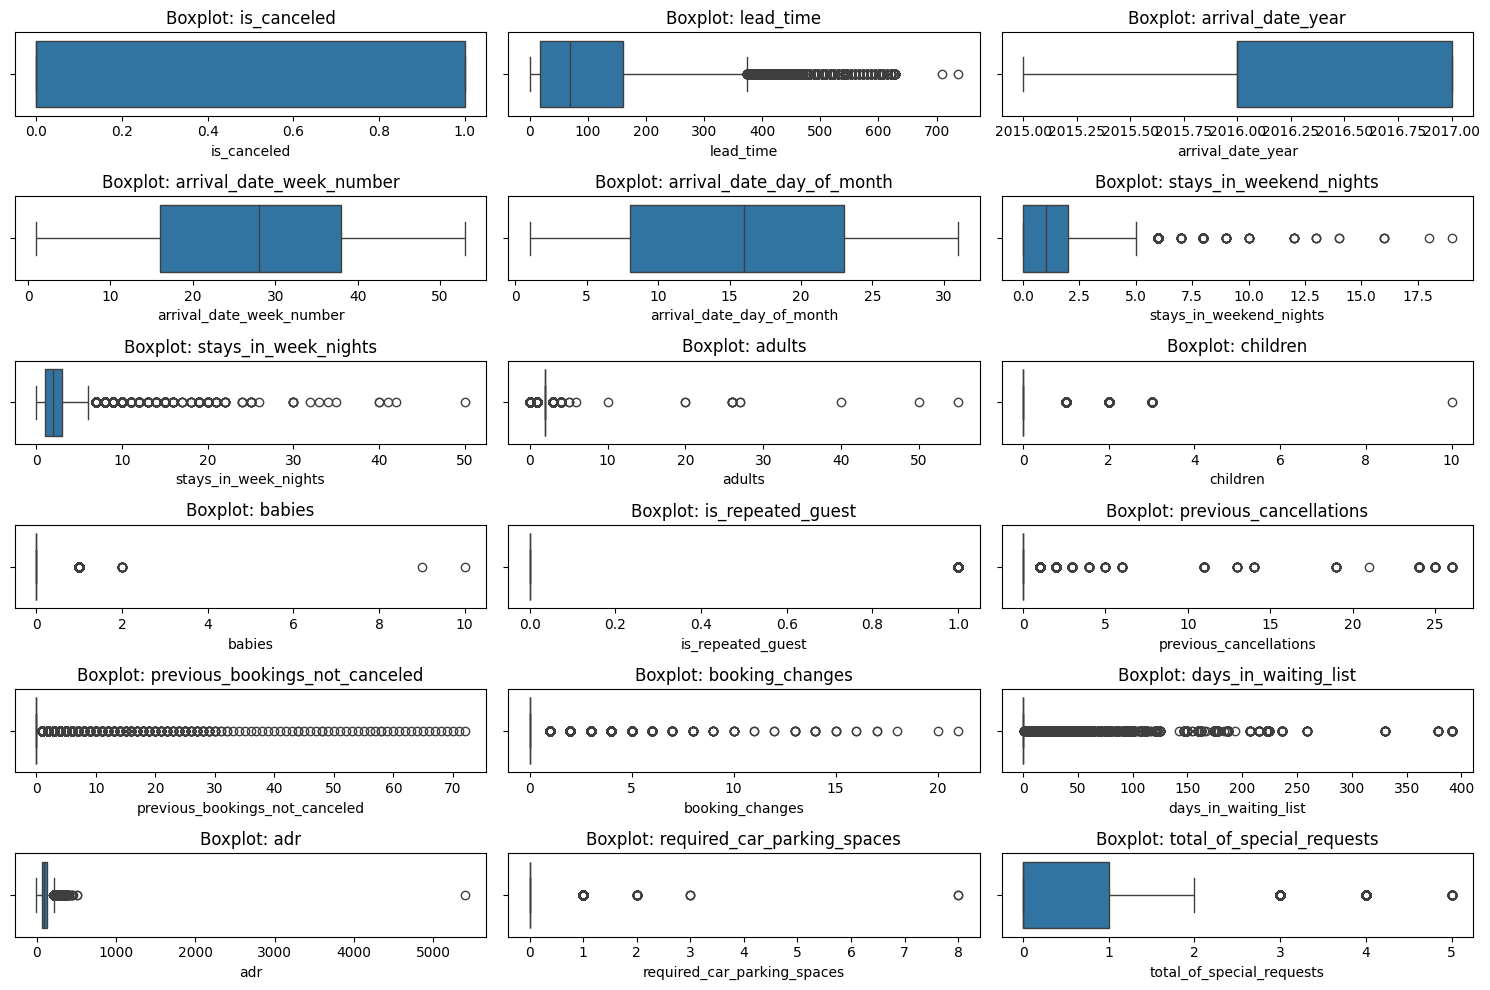

In [ ]:
# Pilih kolom numerik dari dataset
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Menghitung jumlah baris dan kolom yang dibutuhkan untuk subplot
num_cols = 3  # Jumlah kolom subplot
num_rows = int(np.ceil(len(numerical_columns) / num_cols))  # Jumlah baris subplot

# Membuat Boxplot untuk setiap kolom numerik
plt.figure(figsize=(15, 10))  # Menyesuaikan ukuran grafik
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)  # Menentukan grid plot dengan num_rows dan num_cols
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot: {col}')
    plt.tight_layout()  # Agar layout tidak tumpang tindih

plt.show()

Banyak kolom data yang menghasilkan outlier, namun karena dataset diambil berdasarkan observasi asli dan tidak menggunakan data dummy, maka dapat dipertimbangkan bahwa nilai outlier tersebut juga merupakan data asli yang didapatkan dari kondisi nyata.

Sebelum menganalisis objek permasalahan yang ingin diselesaikan ada beberapa hal yang bisa menjadi asumsi dan hypothesis awal terkait faktor penyebab terjadinya pembatalan reservasi hotel:

- **Asumsi:**
  1. Antara tahun 2015 dan 2017, tidak ada kejadian penting atau insiden tak terduga yang berdampak besar pada data yang dipertimbangkan.
  2. Faktor paling signifikan yang memengaruhi perolehan pendapatan adalah terjadinya pembatalan pemesanan.
  3. Pembatalan mengakibatkan kamar tidak terisi selama durasi pemesanan awal.
  4. Klien biasanya membuat reservasi hotel di tahun yang sama saat mereka membatalkannya.

- **Hypothesis:**
  1. Pembatalan lebih banyak terjadi saat harga lebih tinggi.
  2. Saat daftar tunggu lebih panjang, pelanggan cenderung lebih sering membatalkan reservasi.
  3. Mayoritas klien datang dari agen perjalanan offline untuk melakukan reservasi.

### EDA
Fokus utama dengan kolom fitur: Mencari faktor-faktor yang mungkin menyebabkan adanya pembatalan reservasi.
1. Mencari perbandingan jumlah tidak pembatalan dan terjadi pembatalan
2. Tingkat pembatalan berdasarkan jenis hotel
3. Tingkat pembatalan berdasarkan lama delay waktu dari pemesanan hingga kedatangan
4. Tingkat pembatalan berdasarkan lama waktu tunggu
5. Tingkat pembatalan berdasarkan segment pasar
6. Analisis Jumlah Pembatalan per Bulan (Juli 2015 - Agustus 2017) + ADR
7. Analisis Jumlah Pembatalan dari asal negara pelanggan

In [ ]:
# Memeriksa seluruh unique value pada tiap kolom kategorikal
for col in df.describe(include='object').columns:
    print(col)
    print(df[col].unique())
    print('-'*50)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'
 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT'
 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN' 'SYC'
 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB' 'CMR'
 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 

In [ ]:
df2 = df.copy()

In [ ]:
# Jumlah pembatalan reservasi keseluruhan
cancel_count = df2['is_canceled'].value_counts()
cancel_count

,count
is_canceled,
0,75166
1,44220


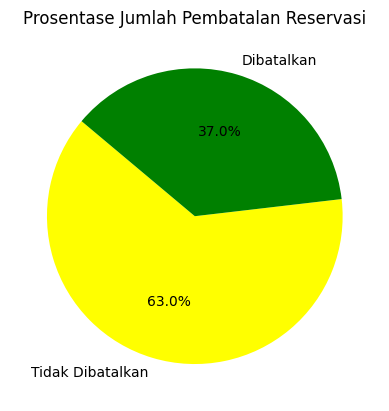

In [ ]:
plt.pie(cancel_count, labels=['Tidak Dibatalkan', 'Dibatalkan'], autopct='%1.1f%%', colors=['yellow', 'green'], startangle=140)
plt.title('Prosentase Jumlah Pembatalan Reservasi')
plt.show()

Data target pembatalan reservasi lebih di dominasi oleh bagian tidak membatalkan daripada target yang ingin dicari yakni membatalkan (Data imbalanced).

In [ ]:
# Jumlah pembatalan berdasarkan jenis hotel
cancel_hotel = df2.groupby('hotel')['is_canceled'].value_counts()
cancel_hotel

hotel         is_canceled
City Hotel    0              46228
              1              33098
Resort Hotel  0              28938
              1              11122
Name: count, dtype: int64

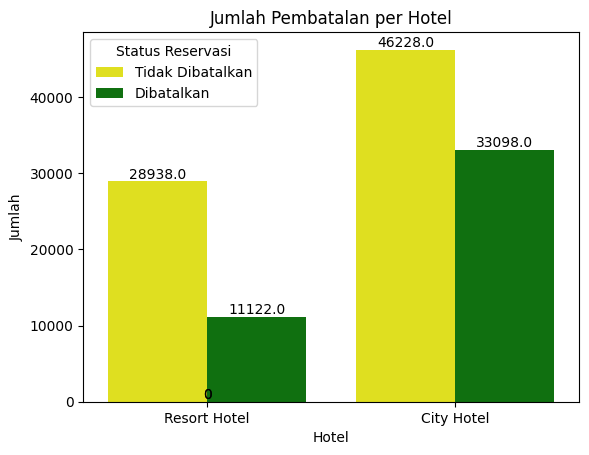

In [ ]:
sns.countplot(x='hotel', hue='is_canceled', data=df2, palette=['yellow','green'])
plt.title('Jumlah Pembatalan per Hotel')
plt.xlabel('Hotel')
plt.ylabel('Jumlah')
plt.legend(title='Status Reservasi', labels=['Tidak Dibatalkan', 'Dibatalkan'])
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5),
                textcoords='offset points')
plt.show()

Jumlah pembatalan lebih banyak dilakukan pada City_Hotel

In [ ]:
# Jumlah pembatalan berdasarkan delay waktu pemesanan hingga kedatangan
cancel_lead_time = df2.groupby('lead_time')['is_canceled'].value_counts()
cancel_lead_time

lead_time  is_canceled
0          0              5915
           1               430
1          0              3139
           1               319
2          0              1856
                          ... 
622        1                17
626        1                30
629        1                17
709        0                 1
737        0                 1
Name: count, Length: 887, dtype: int64

In [ ]:
# Buat kategori lama waktu jeda antara pemesanan ke hari kedatangan
df2['lead_time_category'] = pd.cut(df2['lead_time'], bins=[0, 7, 14, 30, 60, float('inf')],
                                  labels=['0-7 hari', '8-14 hari', '15-30 hari', '31-60 hari', '>60 hari'])

# Kelompokkan data dan hitung jumlah pembatalan
cancel_hotel_time = df2.groupby(['hotel', 'lead_time_category', 'is_canceled']).size().reset_index(name='count')

# Filter hanya pembatalan (is_canceled=1)
cancel_hotel_time = cancel_hotel_time[cancel_hotel_time['is_canceled'] == 1]

# Urutkan dan ambil 5 teratas
top_10_cancels = cancel_hotel_time.sort_values(by='count', ascending=False).head(10)

top_10_cancels

<ipython-input-25-3f2b6632dae5>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cancel_hotel_time = df2.groupby(['hotel', 'lead_time_category', 'is_canceled']).size().reset_index(name='count')


,hotel,lead_time_category,is_canceled,count
9,City Hotel,>60 hari,1,23295
19,Resort Hotel,>60 hari,1,7570
7,City Hotel,31-60 hari,1,4608
5,City Hotel,15-30 hari,1,2747
17,Resort Hotel,31-60 hari,1,1566
3,City Hotel,8-14 hari,1,1132
1,City Hotel,0-7 hari,1,1043
15,Resort Hotel,15-30 hari,1,990
11,Resort Hotel,0-7 hari,1,426
13,Resort Hotel,8-14 hari,1,413


Dari data tersebut diketahui bahwa pembatalan reservasi lebih banyak terjadi ketika telah melewati lebih dari satu sampai dua bulan rentang antara pemesanan hingga tanggal kedatangan. Dan pembatalan reservasi cenderung lebih sering terjadi pada city hotel sedangkan pada resort hotel banyak terjadi pembatalan hingga dua bulan lebih sebelum tanggal kedatangan dan beberapa minggu pertama.

catatan*:
- pd.cut: Membuat kategori lama waktu tunggu berdasarkan rentang yang ditentukan.

In [ ]:
# Jumlah pembatalan berdasarkan lama waktu tunggu
cancel_days_in_waiting_list = df2.groupby('days_in_waiting_list')['is_canceled'].value_counts().reset_index()
cancel_days_in_waiting_list

,days_in_waiting_list,is_canceled,count
0,0,0,73827
1,0,1,41861
2,1,0,9
3,1,1,3
4,2,0,4
...,...,...,...
198,330,0,14
199,330,1,1
200,379,1,9
201,379,0,6


Dari hasil ini mengindikasikan bahwa pembatalan lebih banyak dilakukan oleh pelanggan itu sendiri. Karena dari hasil ini menjelaskan bahwa setiap pelanggan yang melakukan reservasi kamar dapat langsung terdata dan dikonfirmasi dengan ketersedian kamar hotel yang diinginkan (persediaan kamar seimbang dengan permintaan reservasi).

In [ ]:
# Buat kategori lama waktu jeda untuk waiting list
df2['waiting_time_category'] = pd.cut(df2['days_in_waiting_list'], bins=[0, 7, 14, 30, 60, float('inf')],
                                  labels=['0-7 hari', '8-14 hari', '15-30 hari', '31-60 hari', '>60 hari'])

# Kelompokkan data dan hitung jumlah pembatalan
cancel_hotel_wait = df2.groupby(['hotel', 'waiting_time_category', 'is_canceled']).size().reset_index(name='count')

# Filter hanya pembatalan (is_canceled=1)
cancel_hotel_wait = cancel_hotel_wait[cancel_hotel_wait['is_canceled'] == 1]

# Urutkan dan ambil 5 teratas
top_10_cancels = cancel_hotel_wait.sort_values(by='count', ascending=False).head(10)

top_10_cancels

<ipython-input-27-263a79c092b6>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cancel_hotel_wait = df2.groupby(['hotel', 'waiting_time_category', 'is_canceled']).size().reset_index(name='count')


,hotel,waiting_time_category,is_canceled,count
7,City Hotel,31-60 hari,1,1058
9,City Hotel,>60 hari,1,842
5,City Hotel,15-30 hari,1,313
1,City Hotel,0-7 hari,1,76
3,City Hotel,8-14 hari,1,53
19,Resort Hotel,>60 hari,1,7
17,Resort Hotel,31-60 hari,1,5
11,Resort Hotel,0-7 hari,1,3
13,Resort Hotel,8-14 hari,1,1
15,Resort Hotel,15-30 hari,1,1


Untuk pembatalan reservasi berdasarkan waiting list dimana pemesanan berada dalam daftar tunggu sebelum dikonfirmasi kepada pelanggan oleh pihak hotel. Dari hasil ini lebih di domnasi oleh city hotel dimana kemungkinan selalu penuh oleh pelanggan lain atau tidak tersedianya kamar sesuai jumlah permintaan sehingga harus menunggu pihak hotel terkait untuk memastikan ketersediaan kamar.

In [ ]:
# Jumlah pembatalan berdasarkan channel distribusi
cancel_segment = df2.groupby('market_segment')['is_canceled'].value_counts()
cancel_segment

market_segment  is_canceled
Aviation        0                185
                1                 52
Complementary   0                646
                1                 97
Corporate       0               4303
                1                992
Direct          0              10672
                1               1933
Groups          1              12097
                0               7714
Offline TA/TO   0              15908
                1               8311
Online TA       0              35738
                1              20738
Name: count, dtype: int64

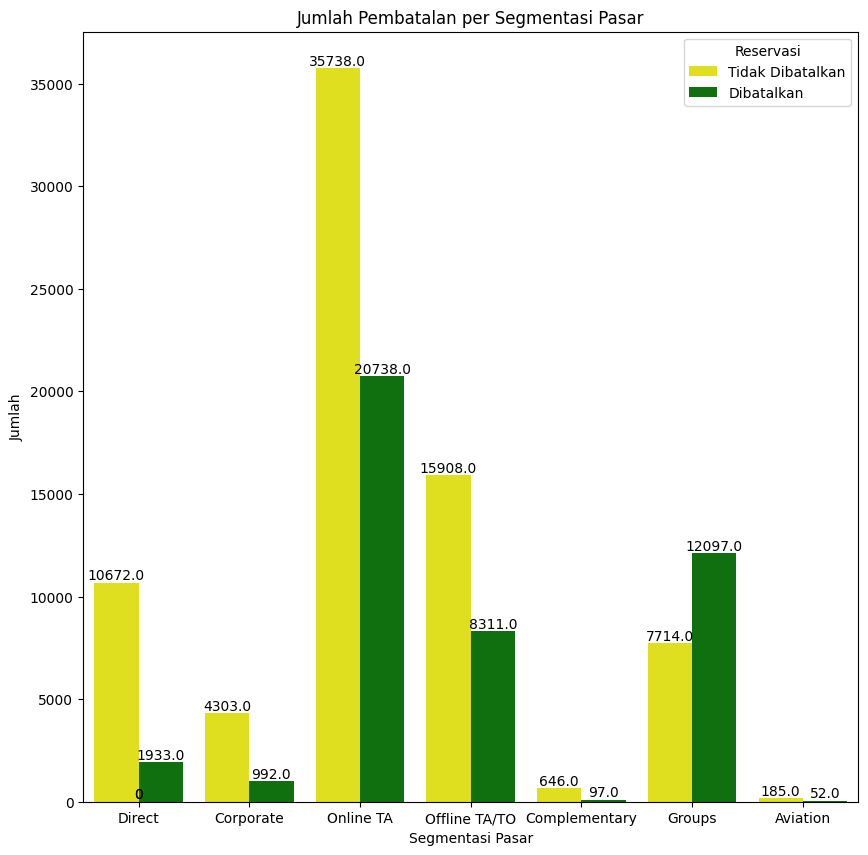

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x='market_segment', hue='is_canceled', data=df2, palette=['yellow','green'])
plt.title('Jumlah Pembatalan per Segmentasi Pasar')
plt.xlabel('Segmentasi Pasar')
plt.ylabel('Jumlah')
plt.legend(title='Reservasi', labels=['Tidak Dibatalkan', 'Dibatalkan'])
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5),
                textcoords='offset points')
plt.show()

Berdasarkan segmentasi pasar, lebih banyak terjadi pembatalan reservasi melalui pemesanan Online TA(Agen Perjalanan)/TO(Operator Tur). Ini mengindikasikan bahwa pelanggan lebih mudah melakukan reservasi melalui online, namun juga lebih rentan untuk membatalkan reservasinya. Kemudian untuk reservasi oleh group lebih banyak melakukan pembatalan daripada reservasi yang tidak membatalkan. Ini dapat diasumsikan mungkin adanya ketidaksesuaian fasilitas/pelayanan yang ditawarkan khusus untuk pemesanan group atau mungkin kurangnya Hotel yang menyediakan kriteria yang diinginkan (asumsi terlepas dari adanya kesalahan pemesanan oleh individu).

In [ ]:
# Mengubah tipe data menjadi datetime
df2['reservation_status_date'] = pd.to_datetime(df2['reservation_status_date'])

# Memisahkan menjadi kolom baru
df2['reservation_status_date_year'] = df2['reservation_status_date'].dt.year
df2['reservation_status_date_month'] = df2['reservation_status_date'].dt.month
df2['reservation_status_date_day'] = df2['reservation_status_date'].dt.day

In [ ]:
# mengambil bulan_tahun dari reservation_status_date
#df['month']=pd.to_datetime(df['reservation_status_date']).dt.month
#df['year']=pd.to_datetime(df['reservation_status_date']).dt.year

# Menggabungkan kolom month dan year
#df['month_year'] = df['month'].astype(str) + '-' + df['year'].astype(str)
df2['month_year'] = df2['reservation_status_date_year'].astype(str) + '-' + df2['reservation_status_date_month'].astype(str)

# menghitung jumlah pembatalan per-bulan
Rev_stat_per_month_year=df2.groupby('month_year')['is_canceled'].value_counts().reset_index(name='total')
Rev_stat_per_month_year

,month_year,is_canceled,total
0,2014-10,1,180
1,2014-11,1,1
2,2015-1,1,948
3,2015-10,0,3304
4,2015-10,1,2438
...,...,...,...
56,2017-7,0,3336
57,2017-7,1,702
58,2017-8,0,3097
59,2017-8,1,320


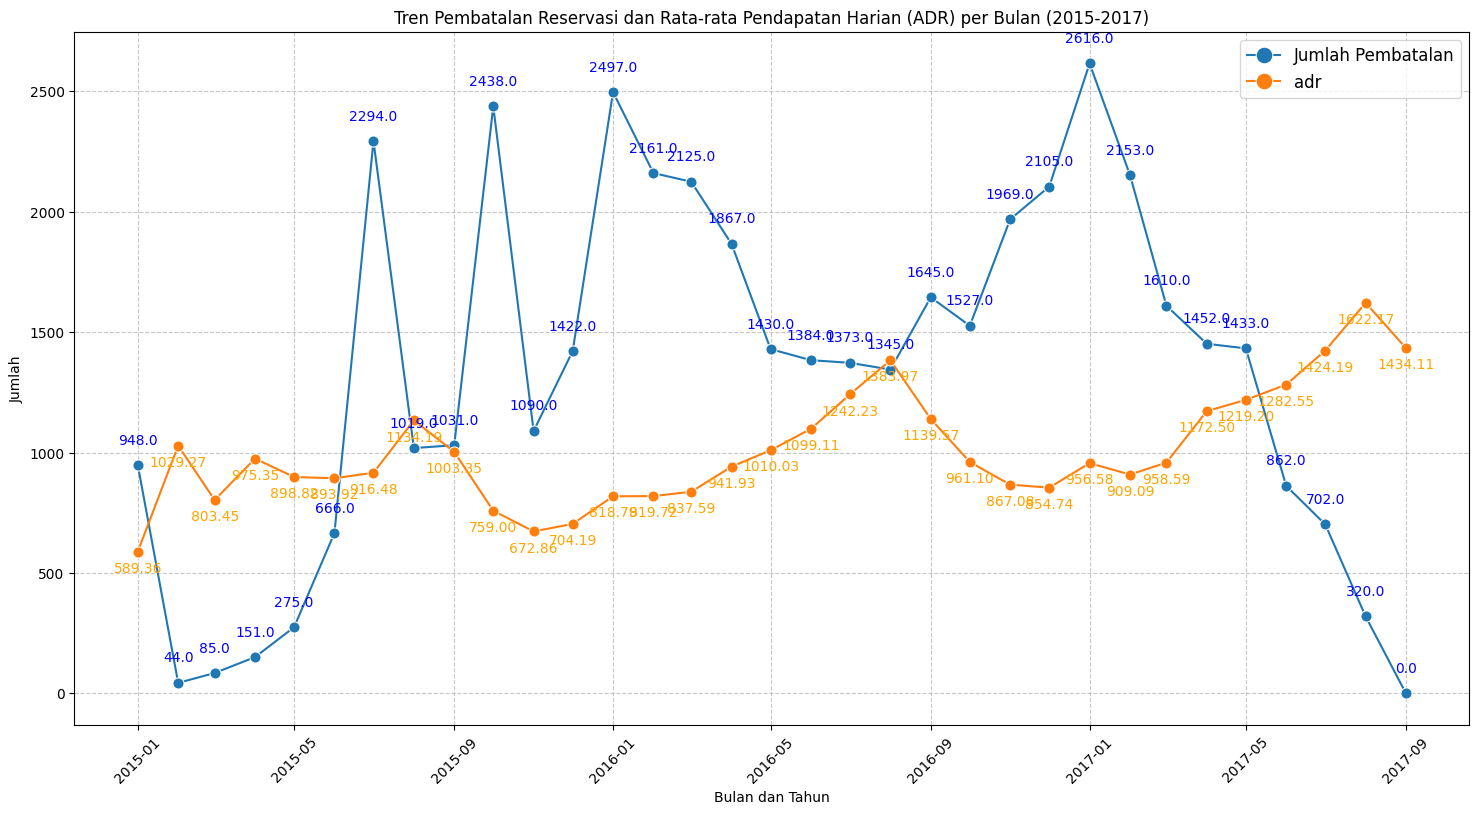

In [ ]:
# Tren pembatalan reservasi hotel July2015 - August2017 + ADR
# Filter data untuk tahun 2015-2017
df2 = df2[(df2['reservation_status_date_year'] >= 2015) & (df2['reservation_status_date_year'] <= 2017)]

# Hitung jumlah pemesanan dan pembatalan per bulan
df_monthly = df2.groupby('month_year').agg({'is_canceled': 'sum', 'adr': 'mean'}).reset_index()

# Konversi 'month_year' ke datetime
df_monthly['month_year'] = pd.to_datetime(df_monthly['month_year'], format='%Y-%m')

# Urutkan data berdasarkan 'month_year'
df_monthly = df_monthly.sort_values(by='month_year')

# Set 'month_year' sebagai index
df_monthly.set_index('month_year', inplace=True)

# Perbesar nilai ADR untuk memudahkan analisa
df_monthly['adr'] = df_monthly['adr'] * 10

# Buat line chart
plt.figure(figsize=(18,9))
sns.lineplot(x='month_year', y='is_canceled', data=df_monthly, label='Jumlah Pembatalan', marker='o', markersize=8)
sns.lineplot(x='month_year', y='adr', data=df_monthly, label='adr', marker='o', markersize=8)

# Anotasi untuk jumlah pembatalan
for i, row in df_monthly.iterrows():
    plt.annotate(f'{row["is_canceled"]}',
                 xy=(row.name, row['is_canceled']),
                 xytext=(0, 15), textcoords='offset points', ha='center',
                 color='blue') # Sesuaikan warna dengan warna garis

# Anotasi untuk ADR
for i, row in df_monthly.iterrows():
    plt.annotate(f'{row["adr"]:.2f}',
                 xy=(row.name, row['adr']),
                 xytext=(0, -15), textcoords='offset points', ha='center',
                 color='orange') # Sesuaikan warna dengan warna garis


plt.grid(linestyle='--', alpha=0.7)

plt.title('Tren Pembatalan Reservasi dan Rata-rata Pendapatan Harian (ADR) per Bulan (2015-2017)')
plt.xlabel('Bulan dan Tahun')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.legend(loc='upper right', fontsize=12, markerscale=1.5)
plt.show()

**Tren Umum**

- Pembatalan: Terdapat fluktuasi yang cukup signifikan pada jumlah pembatalan dari bulan ke bulan. Ada beberapa puncak pembatalan yang terjadi secara periodik, yang mungkin mengindikasikan adanya faktor musiman atau peristiwa khusus yang mempengaruhi keputusan tamu untuk membatalkan reservasi.
- ADR: ADR juga menunjukkan fluktuasi, namun cenderung lebih stabil dibandingkan dengan jumlah pembatalan. Terdapat beberapa periode di mana ADR meningkat seiring dengan penurunan jumlah pembatalan, yang mungkin mengindikasikan bahwa tamu yang membayar lebih tinggi cenderung lebih berkomitmen pada reservasi mereka.

**Pola dan Hubungan**

- Musiman: Tampak adanya pola musiman pada kedua metrik. Jumlah pembatalan cenderung meningkat pada periode tertentu, seperti saat musim liburan atau saat ada event besar. Hal ini mengindikasikan bahwa faktor musiman memiliki pengaruh yang signifikan terhadap perilaku konsumen.
- Korelasi: Tidak ada korelasi yang jelas antara jumlah pembatalan dan ADR secara keseluruhan. Terdapat periode di mana keduanya bergerak searah, namun pada periode lain mereka bergerak berlawanan arah. Ini menunjukkan bahwa faktor-faktor lain selain harga juga mempengaruhi keputusan tamu untuk membatalkan reservasi.

In [ ]:
# Menganalisis asal negara yang melakukan pembatalan reservasi tertinggi (10 teratas)
canceled_data=df2[df2["is_canceled"]==1]
top_contry_canceled=canceled_data.groupby("country")["is_canceled"].sum().sort_values(ascending=False)[:10].reset_index(name="total")
top_contry_canceled

,country,total
0,PRT,27401
1,GBR,2453
2,ESP,2177
3,FRA,1934
4,ITA,1333
5,DEU,1218
6,IRL,832
7,BRA,830
8,USA,501
9,BEL,474


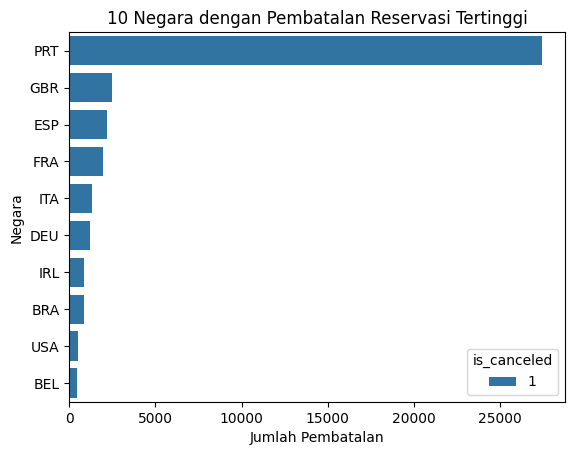

In [ ]:
# Membuat stacked bar chart
sns.countplot(y="country", hue="is_canceled", data=canceled_data, order=top_contry_canceled['country'])
plt.title("10 Negara dengan Pembatalan Reservasi Tertinggi")
plt.xlabel("Jumlah Pembatalan")
plt.ylabel("Negara")
plt.show()

### Feature Engineering

In [ ]:
df3 = df.copy()

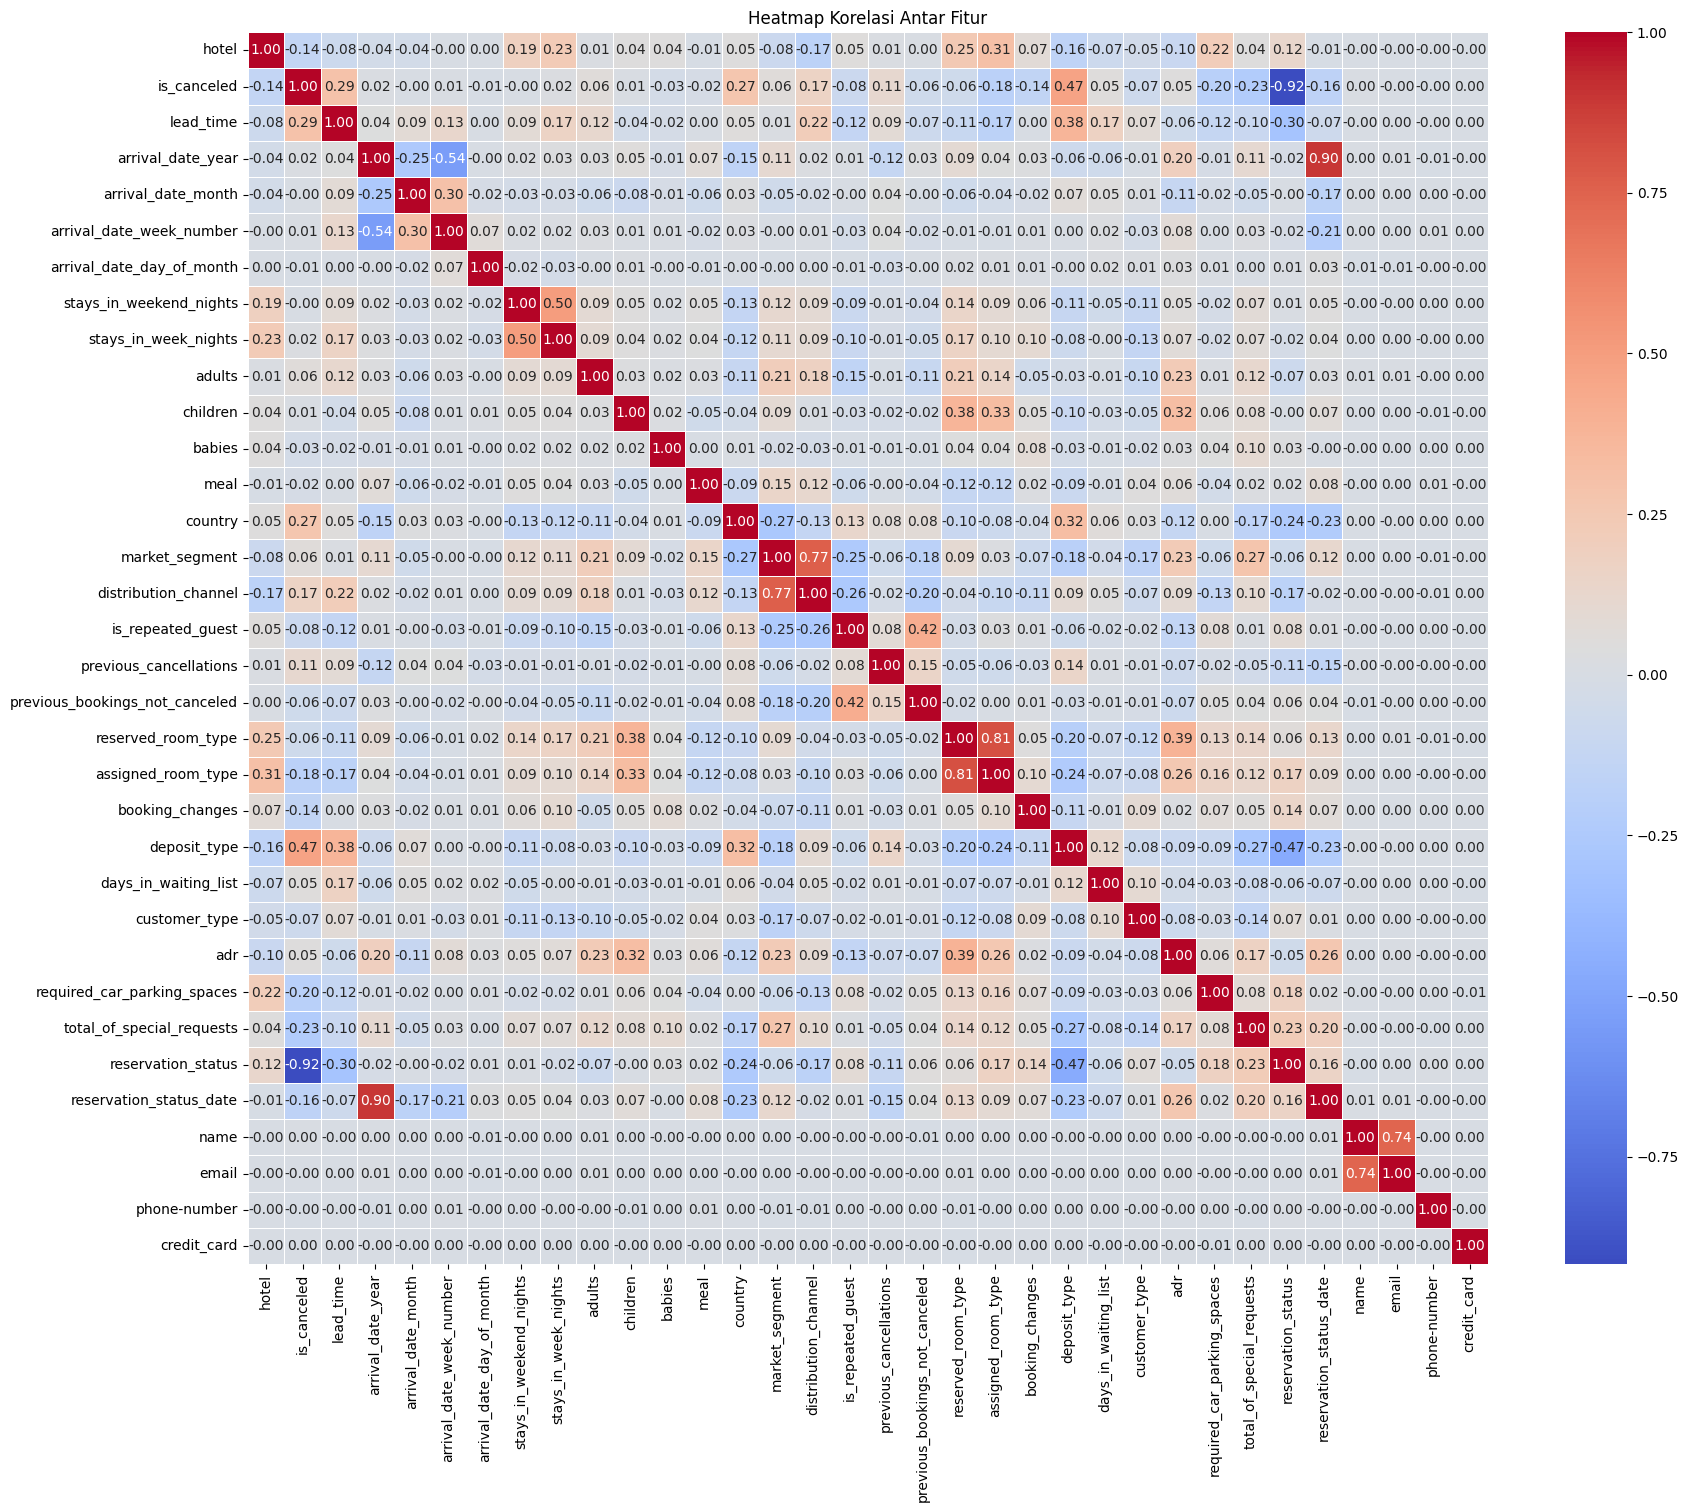

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Menentukan kolom yang memiliki data non-numerik
non_numerical_columns = df3.select_dtypes(include=['object']).columns

# Melakukan Label Encoding pada setiap kolom non-numerik
label_encoder = LabelEncoder()
for col in non_numerical_columns:
    df3[col] = label_encoder.fit_transform(df3[col])

# 3. Menghitung Matriks Korelasi
# Korelasi hanya dapat dihitung pada data numerik
correlation_matrix = df3.corr()

# 4. Membuat Heatmap
plt.figure(figsize=(20, 16))  # Menentukan ukuran gambar heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Menambahkan judul
plt.title('Heatmap Korelasi Antar Fitur')

# Menampilkan heatmap
plt.show()

**Memahami Heatmap Korelasi**

Heatmap korelasi adalah visualisasi yang menunjukkan kekuatan dan arah hubungan antara variabel-variabel dalam suatu dataset. Warna pada heatmap merepresentasikan tingkat korelasi:

- Warna merah: Korelasi positif yang kuat (semakin merah, semakin kuat hubungan positifnya).
- Warna biru: Korelasi negatif yang kuat (semakin biru, semakin kuat hubungan negatifnya).
- Warna putih: Tidak ada korelasi atau korelasi yang sangat lemah.
Analisis Heatmap Korelasi untuk is_canceled

Fokus pada baris dan kolom yang terkait dengan is_canceled (TARGET). Berikut beberapa wawasan yang dapat kita tarik:

**Korelasi Positif:**
- lead_time: Semakin lama waktu antara pemesanan dan tanggal kedatangan, semakin tinggi kemungkinan pembatalan. Ini menunjukkan bahwa tamu yang memesan jauh-jauh hari cenderung lebih mudah membatalkan reservasi.
- previous_cancellations: Tamu yang memiliki riwayat pembatalan sebelumnya cenderung lebih sering membatalkan reservasi di masa depan.
- required_car_parking_spaces: Tamu yang membutuhkan tempat parkir cenderung lebih sering membatalkan reservasi. Ini bisa jadi karena terbatasnya ketersediaan tempat parkir atau karena adanya perubahan rencana perjalanan.

**Korelasi Negatif:**
- is_repeated_guest: Tamu yang pernah menginap sebelumnya cenderung lebih jarang membatalkan reservasi. Ini menunjukkan bahwa tamu yang loyal memiliki tingkat loyalitas yang lebih tinggi.
- total_of_special_requests: Tamu yang memiliki banyak permintaan khusus cenderung lebih jarang membatalkan reservasi. Ini mungkin karena hotel telah berusaha memenuhi permintaan khusus mereka, sehingga tamu merasa lebih terikat dengan reservasi.

**Wawasan Lainnya**
- Variabel yang Kurang Berpengaruh: Sebagian besar variabel lainnya memiliki korelasi yang sangat lemah atau tidak ada korelasi dengan is_canceled. Ini menunjukkan bahwa variabel-variabel tersebut mungkin tidak memiliki pengaruh signifikan terhadap keputusan tamu untuk membatalkan reservasi.
- Interaksi Antar Variabel: Heatmap juga dapat menunjukkan interaksi antara variabel-variabel. Misalnya, mungkin ada interaksi antara lead_time dan is_repeated_guest, di mana pengaruh lead_time terhadap pembatalan berbeda untuk tamu yang sering dan jarang menginap.

### Feature Multicollinearity Correction

In [ ]:
from sklearn.model_selection import train_test_split

feature = df3.drop(columns='is_canceled')
target = df3[['is_canceled']]

feature_df_train, feature_df_test, target_df_train, target_df_test = train_test_split(feature, target, test_size=0.20, random_state=42) # membagi data dengan perbandingan data training : testing (80:20)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

X = add_constant(feature_df_train)

vif_df = pd.DataFrame([vif(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,hotel,1.330792
2,lead_time,1.861895
3,arrival_date_year,35.433663
4,arrival_date_month,1.151291
5,arrival_date_week_number,6.184694
6,arrival_date_day_of_month,1.011908
7,stays_in_weekend_nights,1.380779
8,stays_in_week_nights,1.469440
9,adults,1.183030
10,children,1.245825


**Hasil cek korelasi antar fitur (> 0.7 threshold):**
- is_canceled dan reservation_status (-0.92)
- arrival_date_year dan reservation_status_date (0.90)
- market_segment dan distribution_channel	(0.77)
- reserved_room_type dan assigned_room_type	(0.81)
- name dan email (0.74)

**Hasil nilai vif score (> 5.0 threshold):**
- arrival_date_year (35.433663)
- arrival_date_week_number (6.184694)
- reservation_status_date (26.917475)

**Perimbangan langkah lanjutan menangani multikolinearitas:**
1. **Menghapus Fitur Redundan:** Dalam project ini saya bertujuan membangun model ml guna mencari dan memprediksi tamu yang berkemungkinan melakukan pembatalan reservasi hotel. Mungkin jika untuk mengidentifikasi faktor mengapa terjadi pembatalan reservasi berdasarkan dataset yang ada, kolom reservation_status memiliki informasi yang lebih kaya dengan adanya multi-kelas (lebih dari dua kelas). Namun, disini saya memutuskan untuk **menghapus kolom reservation_status** yang menyajikan informasi serupa dengan target is_canceled meski dalam bentuk yang berbeda. Maka saya **pertahankan is_canceled sebagai variabel target model ml** untuk memprediksi pembatalan reservasi. Kemudian saya memutuskan untuk **menghapus kolom fitur data privasi tamu seperti name, email, phone-number dan credit_card** karena dalam project ini saya tidak melakukan segmentasi dan saya menganggap keempat fitur ini tidak relevan untuk model prediksi sehingga bisa dihapus.

2. **Mengkombinasikan Fitur:** Membentuk fitur baru guna mencari 'waktu pemesanan', 'lama waktu tinggal', 'musim pembatalan', dll dengan kombinasi antara fitur-fitur yang mewakili tanggal (date) baik kedatangan (arrival), status_reservasi_date (canceled or check-out). Diharapkan bisa mengurangi fitur yang tidak perlu dan menghasilkan fitur yang lebih relevan.

3. **Pengurangan Dimensi:** Jika masih banyak fitur yang berkorelasi, maka akan dipertimbangkan untuk mengurangi dimensi dataset dengan PCA maupun FA.

4. **Seleksi Fitur:** Memilih fitur yang berkorelasi tinggi dengan variabel target is_canceled karena dianggap memberikan informasi yang lebih relevan.

5. **Analisis lebih lanjut:** menggunakan visualisasi seperti scatter plot atau pair plot untuk melihat hubungan antar fitur secara lebih detail serta pemahaman mendalam seputar bisnis perhotelan.

### Feature Processing Research


In [ ]:
df4 = df.copy()

In [ ]:
# 1. Menghapus Fitur Redundan
df4 = df4.drop(columns=['reservation_status'])
df4 = df4.drop(columns=['name','email','phone-number','credit_card'])
df4.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,C,3,No Deposit,0,Transient,0.0,0,0,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,C,4,No Deposit,0,Transient,0.0,0,0,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,A,C,0,No Deposit,0,Transient,75.0,0,0,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,A,0,No Deposit,0,Transient,75.0,0,0,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,A,0,No Deposit,0,Transient,98.0,0,1,2015-07-03


In [ ]:
# Mencari apakah ada tamu yang membatalkan reservasi karena perbedaan kamar yang dipesan dengan yang disediakan hotel
different_room_cancel = df4[(df4['reserved_room_type'] != df4['assigned_room_type']) & (df4['is_canceled'] == 1)]
different_room_cancel

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
122,Resort Hotel,1,36,2015,July,27,4,0,1,1,...,E,G,1,No Deposit,0,Transient,123.0,0,0,2015-07-04
467,Resort Hotel,1,6,2015,July,29,17,0,2,2,...,A,C,0,No Deposit,0,Transient,110.5,0,1,2015-07-17
504,Resort Hotel,1,0,2015,July,29,17,0,1,2,...,L,C,0,No Deposit,0,Transient,136.0,0,0,2015-07-17
779,Resort Hotel,1,37,2015,July,31,29,1,4,2,...,A,D,0,No Deposit,0,Transient,133.0,0,1,2015-07-27
783,Resort Hotel,1,37,2015,July,31,29,1,4,2,...,A,D,0,No Deposit,0,Transient,133.0,0,1,2015-07-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106117,City Hotel,1,23,2017,February,8,21,0,0,2,...,A,K,1,No Deposit,0,Transient,0.0,0,0,2017-02-21
108829,City Hotel,1,25,2017,May,18,6,2,1,1,...,E,F,0,No Deposit,0,Transient,125.0,0,0,2017-05-06
110280,City Hotel,1,132,2017,April,17,25,0,0,0,...,D,K,1,No Deposit,0,Transient,0.0,0,3,2017-04-25
111925,City Hotel,1,6,2017,July,29,17,1,0,1,...,A,D,0,No Deposit,0,Transient,65.0,0,0,2017-07-17


Ternyata ada tamu yang membatalkan reservasi ketika tipe kamar yang dipesan, berbeda dengan tipe kamar yang ditetapkan dalam pemesanan. Ini bisa menjadi salah satu objek atau faktor tamu membatalkan reservasinya.

In [ ]:
# Membuat kolom baru 'different_room_reserved' untuk menunjukkan perbedaan
df4['different_room_reserved'] = df4['reserved_room_type'] != df4['assigned_room_type']

# Melakukan Label Encoding pada kolom 'different_room_reserved'
df4['different_room_reserved'] = df4['different_room_reserved'].map({True: 1, False: 0})
df4.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,different_room_reserved
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,2015-07-01,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,2015-07-01,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,2015-07-02,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,2015-07-02,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,2015-07-03,0


In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119386 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119386 non-null  object 
 1   is_canceled                     119386 non-null  int64  
 2   lead_time                       119386 non-null  int64  
 3   arrival_date_year               119386 non-null  int64  
 4   arrival_date_month              119386 non-null  object 
 5   arrival_date_week_number        119386 non-null  int64  
 6   arrival_date_day_of_month       119386 non-null  int64  
 7   stays_in_weekend_nights         119386 non-null  int64  
 8   stays_in_week_nights            119386 non-null  int64  
 9   adults                          119386 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119386 non-null  int64  
 12  meal                 

In [ ]:
# Buat dictionary mapping
bulan_angka = {'July' : 7, 'August' : 8, 'September' : 9, 'October' : 10, 'November' : 11, 'December' : 12,
               'January' : 1, 'February' : 2, 'March' : 3, 'April' : 4, 'May' : 5, 'June' : 6
               }

# Map ke DataFrame
df4['arrival_date_month'] = df4['arrival_date_month'].map(bulan_angka)
df4.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,different_room_reserved
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,2015-07-01,0
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,2015-07-01,0
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,2015-07-02,1
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,2015-07-02,0
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,2015-07-03,0


In [ ]:
# 2. Mengkombinasikan fitur untuk mencari tanggal pemesanan (order_date)

# Menggabungkan kolom menjadi string dengan format YYYY-MM-DD
df4['arrival_date'] = df4['arrival_date_year'].astype(str) + '-' + df4['arrival_date_month'].astype(str).str.zfill(2) + '-' + df4['arrival_date_day_of_month'].astype(str).str.zfill(2)

# Mengubah ke tipe data datetime
df4['arrival_date'] = pd.to_datetime(df4['arrival_date'])

# Menghitung order_date (arrival_date - lead_time per day nya)
df4['order_date'] = df4['arrival_date'] - pd.to_timedelta(df4['lead_time'], unit='D')

# Mengubah reservation_status_date menjadi datetime (jika belum)
df4['reservation_status_date'] = pd.to_datetime(df4['reservation_status_date'])

In [ ]:
# Fungsi untuk menentukan musim
def get_season(month):
    if month in (12, 1, 2):
        return 'Winter'
    elif month in (3, 4, 5):
        return 'Spring'
    elif month in (6, 7, 8):
        return 'Summer'
    else:
        return 'Autumn'

# Untuk tanggal pemesanan
# Tambahkan kolom musim dan tahun
df4['season_order'] = df4['order_date'].dt.month.apply(get_season)
df4['year_order'] = df4['order_date'].dt.year

# Kelompokkan dan hitung
grouped = df4.groupby(['year_order', 'season_order'])
result_order = grouped.agg({'order_date': 'count'})
result_order.columns = ['total_orders']

# Untuk tanggal konfirmasi status reservasi terakhir
# Tambahkan kolom musim dan tahun
df4['season_reserved'] = df4['reservation_status_date'].dt.month.apply(get_season)
df4['year_reserved'] = df4['reservation_status_date'].dt.year

# Kelompokkan dan hitung
grouped2 = df4[df4['is_canceled'] == 1].groupby(['year_reserved', 'season_reserved'])
result_reserved = grouped2.agg({'reservation_status_date': 'count', 'adr': 'mean'})
result_reserved.columns = ['total_cancellations', 'avg_adr']

# Gabungkan kedua hasil grouping
result = pd.concat([result_order, result_reserved], axis=1)

# Mengganti NaN dengan 0 (jika ada)
result['total_orders'] = result['total_orders'].fillna(0)
result['avg_adr'] = result['avg_adr'].fillna(0)
result['total_cancellations'] = result['total_cancellations'].fillna(0)

result

total_orders  total_cancellations     avg_adr
2013 Summer             1                  0.0    0.000000
2014 Autumn          2621                181.0   62.453039
     Spring             5                  0.0    0.000000
     Summer            10                  0.0    0.000000
2015 Autumn         12872               4559.0   78.816705
     Spring          2795                511.0   90.557143
     Summer          9855               3979.0   90.315811
     Winter          6119               2414.0   73.701023
2016 Autumn         14326               5141.0  100.646516
     Spring         14368               5422.0  107.917097
     Summer         10285               4102.0  124.629269
     Winter         19564               6763.0   93.989366
2017 Spring          9228               4495.0  135.803219
     Summer          3696               1884.0  157.745260
     Winter         13641               4769.0  111.256471

In [ ]:
data = {'year': [2013, 2013, 2013, 2013, 2014, 2014, 2014, 2014, 2015, 2015, 2015, 2015, 2016, 2016, 2016, 2016, 2017, 2017, 2017, 2017],
        'season': ['Winter', 'Autumn', 'Spring','Summer', 'Winter', 'Autumn', 'Spring', 'Summer', 'Autumn', 'Spring', 'Summer', 'Winter', 'Autumn', 'Spring', 'Summer', 'Winter', 'Spring', 'Summer', 'Winter', 'Autumn'],
        'total_orders': [0, 0, 0, 1, 0, 2621, 5, 10, 12872, 2795, 9855, 6119, 14326, 14368, 10285, 19564, 9228, 3696, 13641, 0],
        'total_cancellations': [0, 0, 0, 0, 0, 181, 0, 0, 4559, 511, 3979, 2414, 5141, 5422, 4102, 6763, 4495, 1884, 4769, 0],
        'avg_adr': [0, 0, 0, 0, 0, 62.453039, 0, 0, 78.816705, 90.557143, 90.315811, 73.701023, 100.646516, 107.917097, 124.629269, 93.989366, 135.803219, 157.745260, 111.256471, 0]}

df_season = pd.DataFrame(data)
df_season

,year,season,total_orders,total_cancellations,avg_adr
0,2013,Winter,0,0,0.000000
1,2013,Autumn,0,0,0.000000
2,2013,Spring,0,0,0.000000
3,2013,Summer,1,0,0.000000
4,2014,Winter,0,0,0.000000
5,2014,Autumn,2621,181,62.453039
6,2014,Spring,5,0,0.000000
7,2014,Summer,10,0,0.000000
8,2015,Autumn,12872,4559,78.816705
9,2015,Spring,2795,511,90.557143


In [ ]:
# Membuat list urutan musim
order_of_seasons = ['Winter', 'Spring', 'Summer', 'Autumn']

# Mengatur ulang kategori pada kolom 'season'
df_season['season'] = pd.Categorical(df_season['season'], categories=order_of_seasons, ordered=True)

# Membuat kolom gabungan tahun-musim
df_season['tahun_musim'] = df_season['year'].astype(str) + '-' + df_season['season'].astype(str)

df_season['tahun_musim'] = pd.Categorical(df_season['tahun_musim'], categories=df_season['tahun_musim'].unique(), ordered=True)
df_season = df_season.sort_values(by=['year', 'season'])
df_season = df_season.reset_index(drop=True)
df_season

,year,season,total_orders,total_cancellations,avg_adr,tahun_musim
0,2013,Winter,0,0,0.000000,2013-Winter
1,2013,Spring,0,0,0.000000,2013-Spring
2,2013,Summer,1,0,0.000000,2013-Summer
3,2013,Autumn,0,0,0.000000,2013-Autumn
4,2014,Winter,0,0,0.000000,2014-Winter
5,2014,Spring,5,0,0.000000,2014-Spring
6,2014,Summer,10,0,0.000000,2014-Summer
7,2014,Autumn,2621,181,62.453039,2014-Autumn
8,2015,Winter,6119,2414,73.701023,2015-Winter
9,2015,Spring,2795,511,90.557143,2015-Spring


In [ ]:
# Perbesar nilai ADR untuk memudahkan analisa
df_season['avg_adr'] = df_season['avg_adr'] * 100

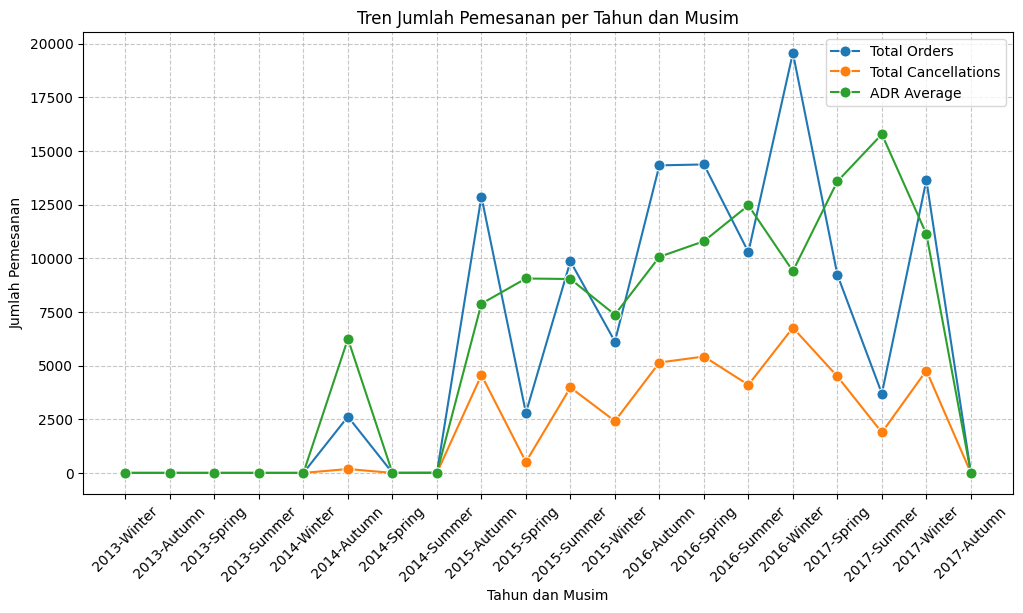

In [ ]:
# Membuat line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='tahun_musim', y='total_orders', data=df_season, label='Total Orders', marker='o', markersize=8)
sns.lineplot(x='tahun_musim', y='total_cancellations', data=df_season, label='Total Cancellations', marker='o', markersize=8)
sns.lineplot(x='tahun_musim', y='avg_adr', data=df_season, label='ADR Average', marker='o', markersize=8)

plt.grid(linestyle='--', alpha=0.7)

plt.title('Tren Jumlah Pemesanan per Tahun dan Musim')
plt.xlabel('Tahun dan Musim')
plt.ylabel('Jumlah Pemesanan')
plt.xticks(rotation=45)  # Memutar label sumbu x agar lebih mudah dibaca
plt.show()

In [ ]:
df4.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,required_car_parking_spaces,total_of_special_requests,reservation_status_date,different_room_reserved,arrival_date,order_date,season_order,year_order,season_reserved,year_reserved
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,0,0,2015-07-01,0,2015-07-01,2014-07-24,Summer,2014,Summer,2015
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,0,0,2015-07-01,0,2015-07-01,2013-06-24,Summer,2013,Summer,2015
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,0,0,2015-07-02,1,2015-07-01,2015-06-24,Summer,2015,Summer,2015
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,0,0,2015-07-02,0,2015-07-01,2015-06-18,Summer,2015,Summer,2015
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,0,1,2015-07-03,0,2015-07-01,2015-06-17,Summer,2015,Summer,2015


In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119386 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119386 non-null  object        
 1   is_canceled                     119386 non-null  int64         
 2   lead_time                       119386 non-null  int64         
 3   arrival_date_year               119386 non-null  int64         
 4   arrival_date_month              119386 non-null  int64         
 5   arrival_date_week_number        119386 non-null  int64         
 6   arrival_date_day_of_month       119386 non-null  int64         
 7   stays_in_weekend_nights         119386 non-null  int64         
 8   stays_in_week_nights            119386 non-null  int64         
 9   adults                          119386 non-null  int64         
 10  children                        119386 non-null  float64     

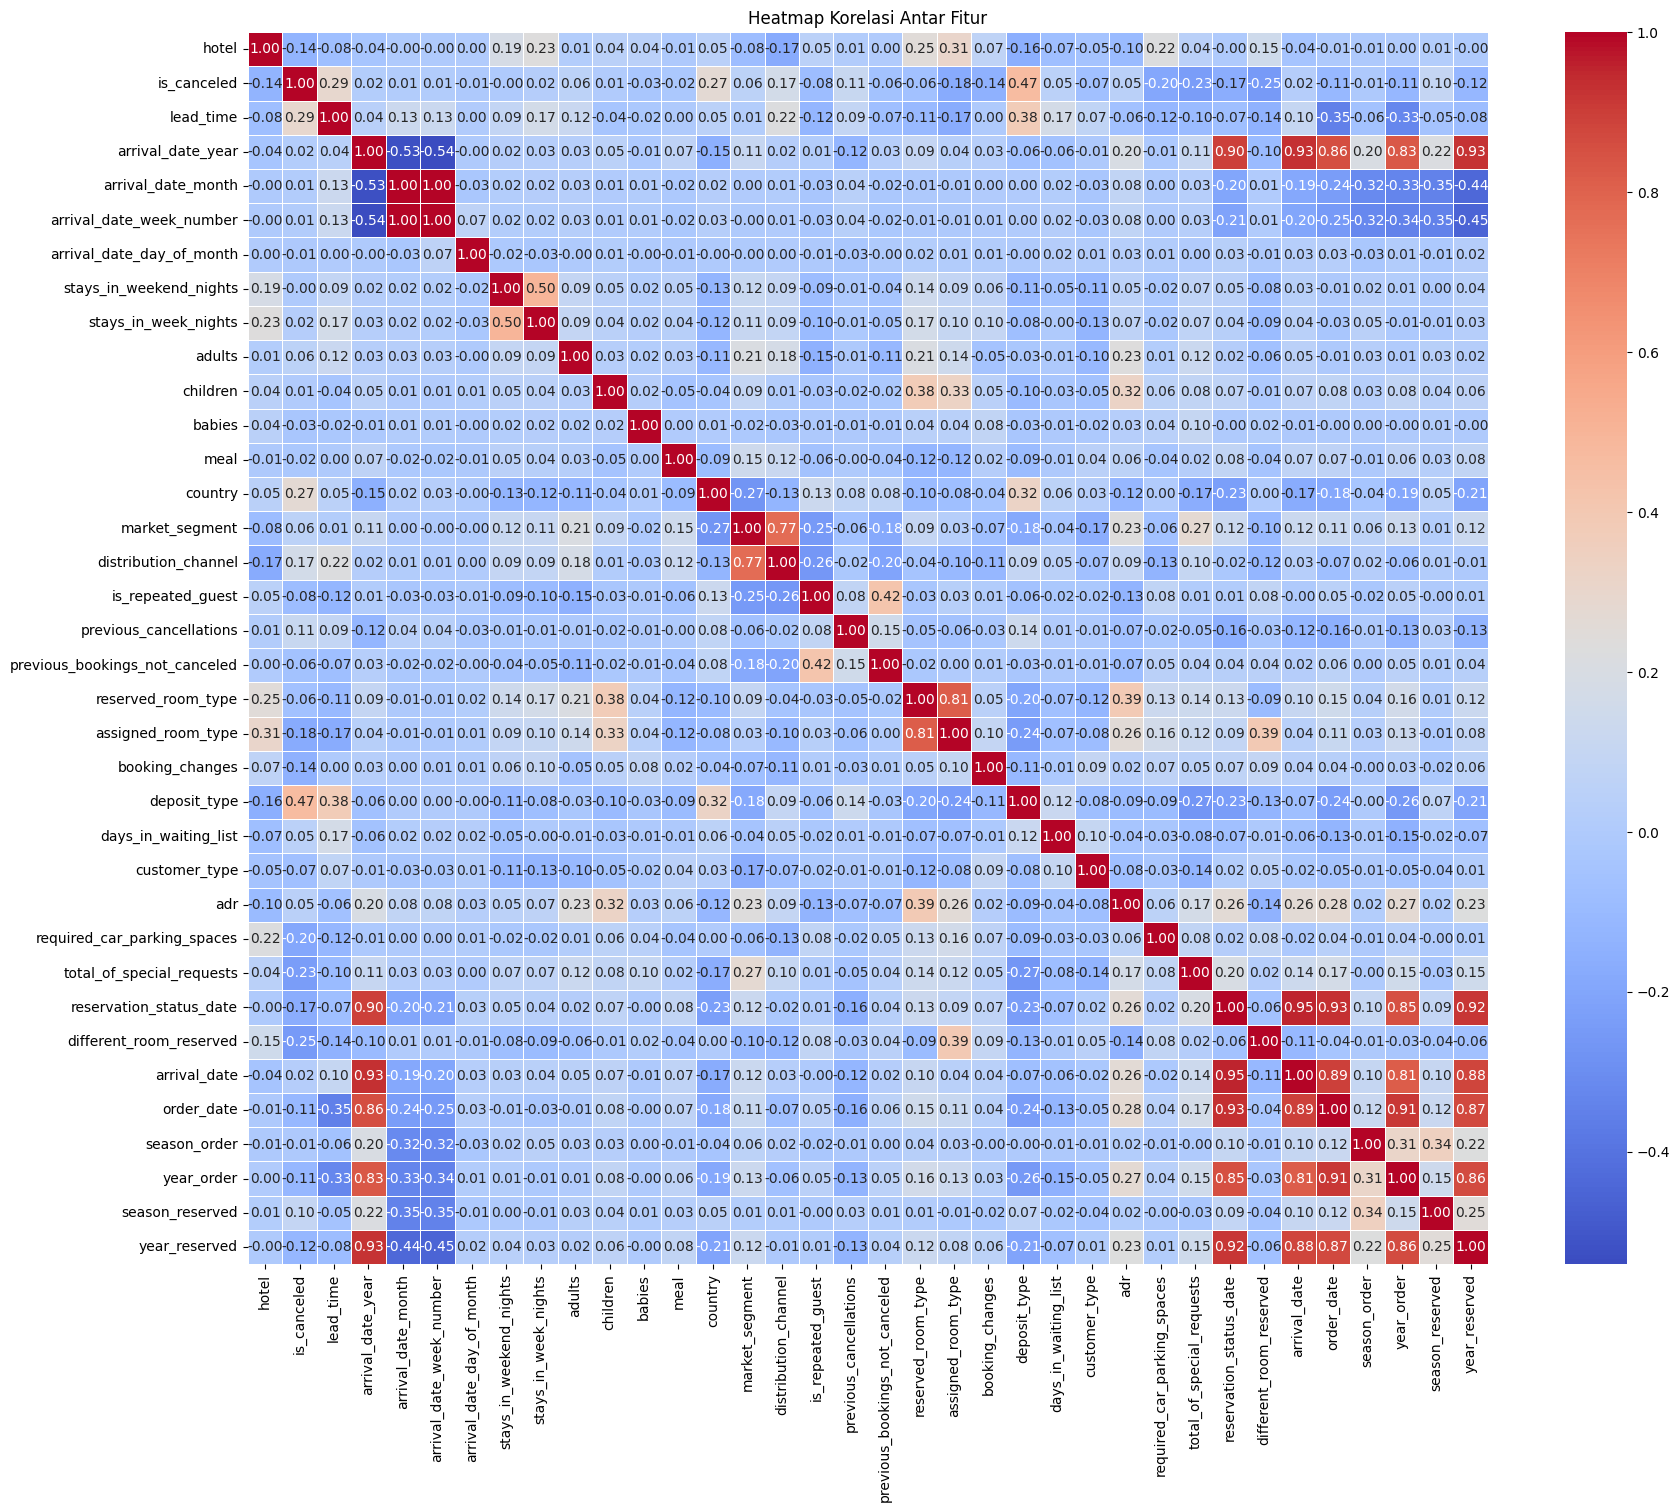

In [ ]:
# Cek korelasi hasil penambahan fitur
from sklearn.preprocessing import LabelEncoder

# Menentukan kolom yang memiliki data non-numerik
non_numerical_columns2 = df4.select_dtypes(include=['object']).columns

# Melakukan Label Encoding pada setiap kolom non-numerik
label_encoder = LabelEncoder()
for col in non_numerical_columns2:
    df4[col] = label_encoder.fit_transform(df4[col])

# 3. Menghitung Matriks Korelasi
# Korelasi hanya dapat dihitung pada data numerik
correlation_matrix = df4.corr()

# 4. Membuat Heatmap
plt.figure(figsize=(20, 16))  # Menentukan ukuran gambar heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Menambahkan judul
plt.title('Heatmap Korelasi Antar Fitur')

# Menampilkan heatmap
plt.show()

Beberapa hal yang didapatkan dari hasil proses koreksi fitur:
1. Tetap melakukan penghapusan fitur yang redundan secara manual.
2. Hasil kombinasi antar fitur justru memperburuk adanya multikolinearitas pada dataset kecuali analisis musim (season). Tidak ada penambahan dari hasil kombinasi antar-fitur yang relevan.
3. Melakukan seleksi fitur yang memiliki korelasi lebih tinggi terhadap variabel target. Maka:
  - **menghapus fitur 'arrival_date_year'** karena berkorelasi cukup tinggi terhadap 'arrival_date_month' dan 'arrival_date_week_number'. Sehingga pertahankan fitur 'reservation_status_date'
  - **menghapus fitur 'market_segment'** dan mempertahankan fitur 'distribution_channel' karena memiliki korelasi yang lebih tinggi terhadap variabel target.
  - **menghapus fitur 'reserved_room_type'** dan mempertahankan fitur 'assigned_room_type' karena memiliki korelasi yang lebih kecil terhadap fitur-fitur lainnya. Dan untuk tipe kamar yang tercatat untuk tamu adalah hasil konfirmasi terakhir yakni pada fitur 'assigned_room_type'.
4. Setelah seluruh fitur telah di proses ulang, cek hasil vif score untuk melihat kondisi multikolinearitas. Kemudian bandingkan jika tidak ada penghapusan fitur dengan metode pengurangan dimensi dataset menggunakan Principal Component Analysis (PCA) untuk menemukan komponen utama.

In [ ]:
df5 = df.copy()

In [ ]:
df5.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [ ]:
df5 = df5.drop(columns=['reservation_status']) # menghapus fitur redundan  yang sama dengan target
df5 = df5.drop(columns=['name','email','phone-number','credit_card']) # menghapus fitur data privasi
df5 = df5.drop(columns=['arrival_date_year']) # menghapus fitur redundan  yang sama dengan 'arrival_date_month' dan 'arrival_date_week_number'
df5 = df5.drop(columns=['market_segment']) # menghapus fitur redundan  yang sama dengan 'distribution_channel'
df5 = df5.drop(columns=['reserved_room_type']) # menghapus fitur redundan  yang sama dengan 'assigned_room_type'

In [ ]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119386 entries, 0 to 119389
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119386 non-null  object 
 1   is_canceled                     119386 non-null  int64  
 2   lead_time                       119386 non-null  int64  
 3   arrival_date_month              119386 non-null  object 
 4   arrival_date_week_number        119386 non-null  int64  
 5   arrival_date_day_of_month       119386 non-null  int64  
 6   stays_in_weekend_nights         119386 non-null  int64  
 7   stays_in_week_nights            119386 non-null  int64  
 8   adults                          119386 non-null  int64  
 9   children                        119386 non-null  float64
 10  babies                          119386 non-null  int64  
 11  meal                            119386 non-null  object 
 12  country              

In [ ]:
# Categorical Encoding (One-Hot Encoding)
#from sklearn.preprocessing import OneHotEncoder

# Melakukan One-Hot Encoding pada setiap kolom non-numerik
#encoder = OneHotEncoder(drop='first', sparse_output=False)

#df5['hotel'] = encoder.fit_transform(df5[['hotel']])
#df5['arrival_date_month'] = encoder.fit_transform(df5[['arrival_date_month']])
#df5['meal'] = encoder.fit_transform(df5[['meal']])
#df5['country'] = encoder.fit_transform(df5[['country']])
#df5['distribution_channel'] = encoder.fit_transform(df5[['distribution_channel']])
#df5['assigned_room_type'] = encoder.fit_transform(df5[['assigned_room_type']])
#df5['deposit_type'] = encoder.fit_transform(df5[['deposit_type']])
#df5['customer_type'] = encoder.fit_transform(df5[['customer_type']])
#df5['reservation_status_date'] = encoder.fit_transform(df5[['reservation_status_date']])

In [ ]:
#from sklearn.preprocessing import StandardScaler
# Inisialisasi scaler
#scaler = StandardScaler()

# Fit dan transform data
#df5_scaled = scaler.fit_transform(df5)

In [ ]:
# Cek korelasi hasil reduksi fitur secara manual
from sklearn.preprocessing import LabelEncoder

# Menentukan kolom yang memiliki data non-numerik
non_numerical_columns3 = df5.select_dtypes(include=['object']).columns

# Melakukan Label Encoding pada setiap kolom non-numerik
label_encoder = LabelEncoder()
for col in non_numerical_columns3:
    df5[col] = label_encoder.fit_transform(df5[col])

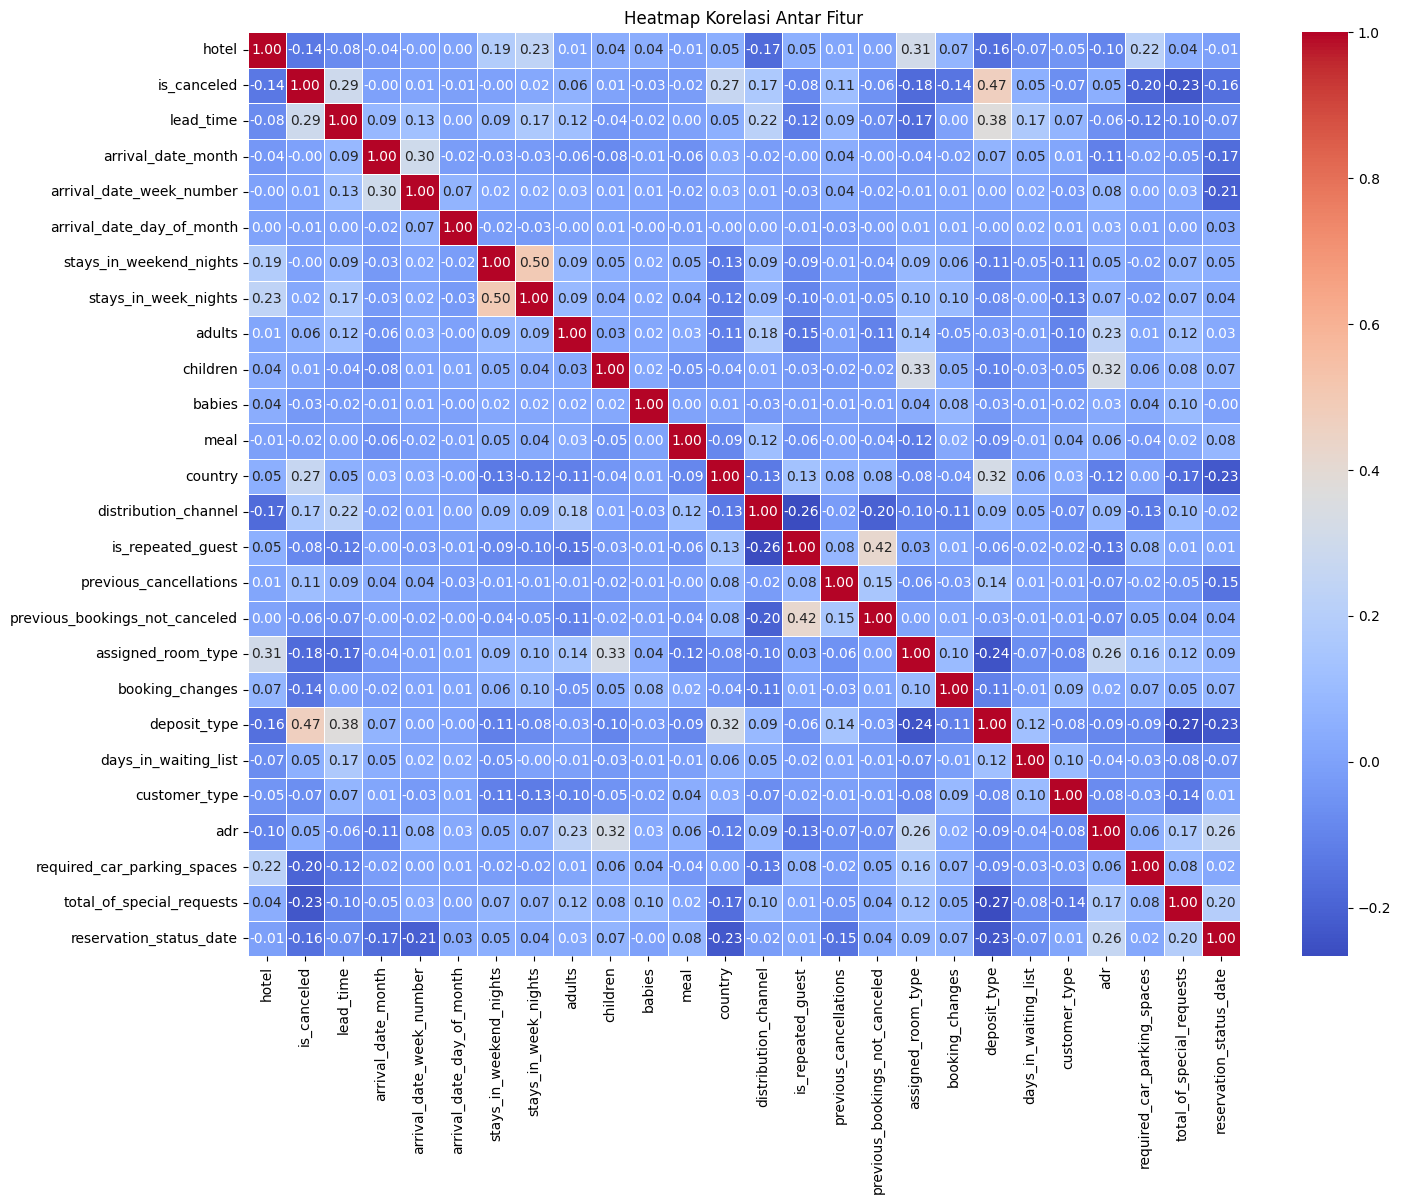

In [ ]:
# Korelasi hanya dapat dihitung pada data numerik
correlation_matrix = df5.corr()

# Membuat Heatmap
plt.figure(figsize=(16, 12))  # Menentukan ukuran gambar heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Menambahkan judul
plt.title('Heatmap Korelasi Antar Fitur')

# Menampilkan heatmap
plt.show()

Dapat diperhatikan bahwa sudah tidak ada fitur yang berkorelasi tinggi. **(Threshold > 0.8)**

In [ ]:
from sklearn.model_selection import train_test_split

feature = df5.drop(columns='is_canceled')
target = df5[['is_canceled']]

feature_df_train, feature_df_test, target_df_train, target_df_test = train_test_split(feature, target, test_size=0.20, random_state=42) # membagi data dengan perbandingan data training : testing (80:20)

In [ ]:
# Check VIF Score
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

X = add_constant(feature_df_train)

vif_df = pd.DataFrame([vif(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,hotel,1.325703
2,lead_time,1.404254
3,arrival_date_month,1.148779
4,arrival_date_week_number,1.206833
5,arrival_date_day_of_month,1.011333
6,stays_in_weekend_nights,1.371725
7,stays_in_week_nights,1.457261
8,adults,1.169085
9,children,1.219985
10,babies,1.019873


Hasil VIF Score menunjukkan tidak ada korelasi yang tinggi antar-fitur **(Treshold > 5.0)**. Maka hasil dataset ini bisa diproses ke dalam model.

**Catatan:** Bandingkan hasil model jika menggunakan PCA

## Model Training

Model yang akan digunakan dalam analisis:
- Logistic Regression (Based Model)
- Decision Tree
- Random Forest
- Support Vector Machine
- XGBoost

### Manual Feature Processing

In [ ]:
df_manual = df.copy()
df_manual.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [ ]:
df_manual = df_manual.drop(columns=['reservation_status']) # menghapus fitur redundan  yang sama dengan target
df_manual = df_manual.drop(columns=['name','email','phone-number','credit_card']) # menghapus fitur data privasi
df_manual = df_manual.drop(columns=['arrival_date_year']) # menghapus fitur redundan  yang sama dengan 'arrival_date_month' dan 'arrival_date_week_number'
df_manual = df_manual.drop(columns=['market_segment']) # menghapus fitur redundan  yang sama dengan 'distribution_channel'
df_manual = df_manual.drop(columns=['reserved_room_type']) # menghapus fitur redundan  yang sama dengan 'assigned_room_type'

### Split Dataset : Train-Test

In [ ]:
# Split Data
from sklearn.model_selection import train_test_split

feature = df_manual.drop(columns='is_canceled')
target = df_manual[['is_canceled']]

# splitting: train and test (80:20)
feature_admit_train, feature_admit_test, target_admit_train, target_admit_test = train_test_split(feature, target, test_size=0.20, random_state=42)

feature_admit_train.shape, feature_admit_test.shape, target_admit_train.shape, target_admit_test.shape

((95508, 25), (23878, 25), (95508, 1), (23878, 1))

In [ ]:
cancel_count = target_admit_train.value_counts()
cancel_count

,count
is_canceled,
0,60193
1,35315


### Categorical Encoding

In [ ]:
# Separate numerical and categorical columns
categorical_cols = ['hotel', 'arrival_date_month', 'meal', 'country', 'distribution_channel', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status_date']
numerical_cols = ['lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests']

In [ ]:
# Categorical Encoding (One-Hot Encoding)
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Melakukan One-Hot Encoding pada setiap kolom non-numerik
encoder = OneHotEncoder(drop='first', sparse_output=False)

feature_admit_train_categorical_encoded = pd.DataFrame(encoder.fit_transform(feature_admit_train[categorical_cols]), columns=encoder.get_feature_names_out())
feature_admit_test_categorical_encoded = pd.DataFrame(encoder.fit_transform(feature_admit_test[categorical_cols]), columns=encoder.get_feature_names_out())

# Standardization untuk kolom numerik
scaler = StandardScaler()
feature_admit_train_numerical_scaled = pd.DataFrame(scaler.fit_transform(feature_admit_train[numerical_cols]), columns=numerical_cols)
feature_admit_test_numerical_scaled = pd.DataFrame(scaler.fit_transform(feature_admit_test[numerical_cols]), columns=numerical_cols)

# Combine the scaled numerical and one-hot encoded categorical DataFrames
feature_admit_train_final = pd.concat([feature_admit_train_numerical_scaled, feature_admit_train_categorical_encoded], axis=1)
feature_admit_test_final = pd.concat([feature_admit_test_numerical_scaled, feature_admit_test_categorical_encoded], axis=1)

Makna Data Kategorikal: Setelah di-one-hot encoding, data kategorikal sudah dalam bentuk biner (0 atau 1). Nilai 0 dan 1 ini sudah memiliki skala yang sama, sehingga tidak perlu distandarisasi lagi.

Tujuan Standarisasi: Standarisasi bertujuan untuk mengubah skala data numerik agar memiliki mean 0 dan standar deviasi 1. Tujuannya adalah agar semua fitur numerik memiliki kontribusi yang sama dalam model.

In [ ]:
feature_admit_train_final.head()

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,...,reservation_status_date_2017-09-03,reservation_status_date_2017-09-04,reservation_status_date_2017-09-05,reservation_status_date_2017-09-06,reservation_status_date_2017-09-07,reservation_status_date_2017-09-08,reservation_status_date_2017-09-09,reservation_status_date_2017-09-10,reservation_status_date_2017-09-12,reservation_status_date_2017-09-14
0,0.542409,-0.673372,-1.113991,1.077020,-0.786595,-1.498383,-0.260381,-0.080887,-0.180856,-0.102857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.364575,0.061288,-0.658664,0.074652,-0.786595,0.251740,4.764054,-0.080887,-0.180856,-0.102857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.402640,0.869414,0.934982,0.074652,-0.786595,0.251740,-0.260381,-0.080887,-0.180856,-0.102857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.374589,-0.452974,0.593486,1.077020,0.788563,0.251740,-0.260381,-0.080887,-0.180856,-0.102857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.757289,-1.481498,0.251991,0.074652,-0.786595,0.251740,-0.260381,-0.080887,-0.180856,-0.102857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Dimensional Reduction (PCA - Principal Component Analysis)

In [ ]:
# Gunakan PCA untuk mendapatkan Principle Components
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(feature_admit_train_final)

explained_variance_ratio = pca.explained_variance_ratio_
print(f"Variansi yang dijelaskan oleh 50 komponen: {explained_variance_ratio.sum() * 100:.2f}%")

Variansi yang dijelaskan oleh 50 komponen: 94.28%


In [ ]:
print('Explained variance ratio: ', pca.explained_variance_ratio_*100)

Explained variance ratio:  [9.69526841 8.01357685 7.10456586 6.11975993 5.56601668 5.14098099
 5.08694739 4.83622181 4.74235526 4.54948057 4.36931614 3.97302342
 3.6765336  3.08062968 2.79628024 2.46064171 1.5589738  1.30884281
 1.0491582  0.87423488 0.78682745 0.55403662 0.51205371 0.47922095
 0.47181353 0.45090819 0.42852348 0.41854918 0.38554412 0.37966642
 0.34899108 0.32013408 0.29790791 0.28316552 0.26729223 0.25788951
 0.22437199 0.2087619  0.14365759 0.13921209 0.12047919 0.1078366
 0.09804269 0.09623329 0.09249312 0.09051358 0.08755714 0.08584046
 0.07495737 0.06529207]


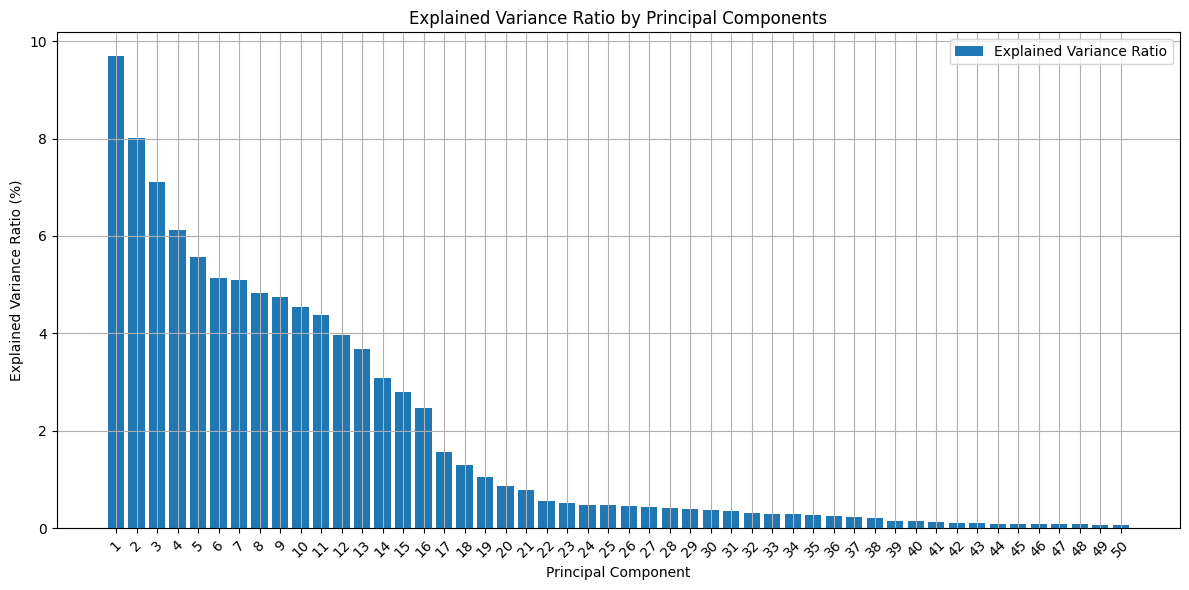

In [ ]:
# Create a list of component numbers for x-axis labels
component_numbers = range(1, len(explained_variance_ratio) + 1)

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(component_numbers, explained_variance_ratio * 100, label='Explained Variance Ratio')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio (%)')
plt.title('Explained Variance Ratio by Principal Components')
plt.xticks(component_numbers, rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(True)  # Add grid lines for better visualization
plt.tight_layout()  # Adjust spacing to avoid clipping labels
plt.show()

In [ ]:
# PCA For data train
pca = PCA(n_components=50)
pca.fit(feature_admit_train_final)
pcs = pca.transform(feature_admit_train_final)

# Tentukan jumlah komponen utama
num_components = 50

# Buat list nama kolom
column_names = [f'PC{i+1}' for i in range(num_components)]

Xtrain_std_pca = pd.DataFrame(data = pcs, columns=column_names)
Xtrain_std_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50
0,-0.780136,0.991976,0.307255,-1.066947,-0.346126,0.619162,-0.431039,-0.785441,0.096227,-0.277320,...,0.007655,0.045481,0.005161,-0.003601,0.035954,0.011021,-0.004811,-0.020768,-0.004754,0.008189
1,1.354433,-2.003450,-1.521814,1.212263,-0.914724,3.153568,-0.695970,-1.536291,-0.431963,-0.089055,...,0.087488,0.054509,0.105302,0.017779,-0.011654,0.008404,-0.043401,-0.003354,-0.022782,-0.228710
2,-0.095073,1.376693,-0.540877,1.143036,0.268793,-0.226015,0.698756,0.015780,-0.182274,0.375837,...,-0.021362,-0.034822,-0.012881,-0.026550,0.032201,-0.000466,-0.003043,-0.000785,0.003779,-0.005214
3,1.094972,0.629795,0.994219,-0.229422,-0.236110,-0.211481,0.326595,0.792863,-0.355300,0.285255,...,-0.012028,0.088009,-0.009959,-0.001165,0.014453,0.016176,-0.016123,-0.003566,-0.019314,0.008643
4,-0.646900,-0.311731,-0.253330,-1.487888,-0.575537,-0.494495,-0.113643,0.859020,-0.518087,0.482102,...,0.024954,0.007550,-0.013207,-0.003733,0.070783,0.014149,-0.002216,0.021551,-0.011989,-0.003974


In [ ]:
# PCA For data test
pca2 = PCA(n_components=50)
pca2.fit(feature_admit_test_final)
pcs2 = pca2.transform(feature_admit_test_final)

# Tentukan jumlah komponen utama
num_components = 50

# Buat list nama kolom
column_names = [f'PC{i+1}' for i in range(num_components)]

Xtest_std_pca = pd.DataFrame(data = pcs2, columns=column_names)
Xtest_std_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50
0,1.686151,0.563862,2.965176,-0.293979,3.025633,0.201580,-1.290580,-2.113116,1.335985,-0.608726,...,-0.060110,0.076774,-0.083094,0.078018,0.029482,-0.046225,0.002404,-0.016493,0.008878,0.200118
1,-0.576661,0.588474,-0.494241,-0.123839,-0.155750,-0.086497,0.152500,-0.168648,0.029034,0.120732,...,0.032495,0.013603,-0.016746,0.039439,-0.029047,-0.048673,-0.007478,-0.001741,-0.015167,-0.002893
2,1.524931,-0.375028,0.889071,-0.680700,-0.994790,-0.564554,0.154688,0.787257,-0.619035,-0.491269,...,0.061399,-0.055315,0.009918,0.016104,0.006097,-0.018537,0.013231,0.005602,-0.015982,-0.035137
3,-0.739086,0.983458,0.351842,-0.986008,-0.350300,0.440494,-0.738748,-0.675093,0.122462,-0.299818,...,0.009141,0.045152,0.011288,0.039597,-0.003447,-0.022787,-0.005918,-0.018725,-0.006677,0.007358
4,0.245087,0.244947,0.026191,-0.874293,-0.698478,0.281134,0.043407,0.232929,-0.263927,0.376508,...,0.073120,-0.033736,0.020442,0.047699,0.044119,0.000483,0.020365,-0.035259,-0.010129,-0.019098


Dari hasil ini untuk fitur memeroleh reduksi dimensi dari hasil One-Hot Encoding sebanyak 1135 kolom fitur menjadi 50 PC dengan nilai variansi yang berhasil dijelaskan sebesar 94.28%, dengan variabel target adalah 'target_admit_train' dan 'target_admit_test'

Dengan menggunakan PCA, kita dapat mereduksi dimensi data menjadi beberapa komponen utama yang menangkap sebagian besar varians data. Kemudian, kita dapat menggunakan komponen utama (PC) sebagai input untuk model klasifikasi seperti logistic regression atau random forest untuk memprediksi apakah tamu akan membatalkan reservasi atau tidak.

In [ ]:
Xtrain_std_pca.shape, Xtest_std_pca.shape

((95508, 50), (23878, 50))

### Define Model

In [ ]:
X_admit_train = Xtrain_std_pca.to_numpy()
y_admit_train = target_admit_train.to_numpy()
y_admit_train = y_admit_train.reshape(len(y_admit_train),)

In [ ]:
# 1. Logistic Regression
from sklearn.linear_model import LogisticRegression

# Membuat model Logistic Regression
logreg = LogisticRegression(random_state=42)

In [ ]:
# 2. Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Membuat model Decision Tree
dtree = DecisionTreeClassifier(random_state=42)

In [ ]:
# 3. Random Forest
from sklearn.ensemble import RandomForestClassifier

# Membuat model Random Forest
rf = RandomForestClassifier(random_state=42)

### Hyperparameter Tuning + Cross Validation

In [ ]:
# 1. Logistic Regression
from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import RandomizedSearchCV

# Mendefinisikan parameter yang akan di-tune
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': [None, 'l1', 'l2']
    #'solver': ['liblinear', 'saga']
}

# Membuat objek RandomSearchCV + k-fold cross_validation
search_lr = GridSearchCV(logreg, param_grid, cv=5, scoring='recall')
# Melatih model dengan RandomSearchCV
search_lr.fit(X_admit_train, y_admit_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'penalty': [None, 'l1', 'l2']},
             scoring='recall')

In [ ]:
# results for logistic regression
cv_result = pd.DataFrame(search_lr.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
14,"{'C': 10, 'penalty': 'l2'}",0.609514,1
11,"{'C': 1, 'penalty': 'l2'}",0.609458,2
0,"{'C': 0.001, 'penalty': None}",0.609373,3
3,"{'C': 0.01, 'penalty': None}",0.609373,3
6,"{'C': 0.1, 'penalty': None}",0.609373,3
9,"{'C': 1, 'penalty': None}",0.609373,3
12,"{'C': 10, 'penalty': None}",0.609373,3
8,"{'C': 0.1, 'penalty': 'l2'}",0.608495,8
5,"{'C': 0.01, 'penalty': 'l2'}",0.602067,9
2,"{'C': 0.001, 'penalty': 'l2'}",0.570466,10


**Hyperparameter yang umum di-tune pada Logistic Regression adalah:**

- C: Parameter regularisasi yang mengontrol kekuatan regularisasi L2. Nilai C yang lebih kecil menunjukkan regularisasi yang lebih kuat, membantu mencegah overfitting.
- penalty: Jenis regularisasi yang digunakan. Opsi umum adalah 'l1' (L1 regularization) atau 'l2' (L2 regularization).
- solver: Algoritma optimasi yang digunakan untuk mencari koefisien model. Pilihan yang umum termasuk 'liblinear', 'saga', 'lbfgs', dan 'newton-cg'.

In [ ]:
# 2. Decision Tree
#from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Definisikan parameter yang ingin di-tuning
param_grid2 = {
    #'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15],
    'min_samples_split': [5, 10, 20],
    'min_samples_leaf': [5, 10, 20]
    #'max_features': ['sqrt', 'log2', None]
}

search_dt = RandomizedSearchCV(dtree, param_grid2, cv=5, scoring='recall')

# Latih model dengan RandomizedSearchCV
search_dt.fit(X_admit_train, y_admit_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   param_distributions={'max_depth': [5, 10, 15],
                                        'min_samples_leaf': [5, 10, 20],
                                        'min_samples_split': [5, 10, 20]},
                   scoring='recall')

In [ ]:
# results for Decision Tree
cv_result2 = pd.DataFrame(search_dt.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result2[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
4,"{'min_samples_split': 10, 'min_samples_leaf': ...",0.726065,1
1,"{'min_samples_split': 10, 'min_samples_leaf': ...",0.711539,2
6,"{'min_samples_split': 5, 'min_samples_leaf': 5...",0.649327,3
7,"{'min_samples_split': 20, 'min_samples_leaf': ...",0.648591,4
9,"{'min_samples_split': 10, 'min_samples_leaf': ...",0.648167,5
2,"{'min_samples_split': 10, 'min_samples_leaf': ...",0.635622,6
3,"{'min_samples_split': 20, 'min_samples_leaf': ...",0.635622,6
8,"{'min_samples_split': 5, 'min_samples_leaf': 2...",0.635622,6
5,"{'min_samples_split': 10, 'min_samples_leaf': ...",0.635452,9
0,"{'min_samples_split': 5, 'min_samples_leaf': 5...",0.635367,10


**Hyperparameter yang umum di-tune pada Decision Tree adalah:**

- criterion: 'gini' atau 'entropy' umumnya memberikan hasil yang baik. Anda bisa mencoba keduanya untuk melihat mana yang lebih cocok untuk dataset Anda.
- max_depth: Mulai dengan nilai yang lebih rendah (misalnya, 5 atau 10) untuk menghindari overfitting, terutama jika data Anda memiliki noise.
Tingkatkan secara bertahap untuk melihat apakah kinerja model membaik.
- min_samples_split: Nilai yang lebih tinggi (misalnya, 10 atau 20) dapat membantu mencegah overfitting, terutama jika jumlah sampel Anda tidak terlalu banyak.
- min_samples_leaf: Nilai yang lebih tinggi (misalnya, 5 atau 10) dapat membuat pohon lebih sederhana dan mengurangi risiko overfitting.
- max_features:'sqrt' atau 'log2' adalah pilihan yang baik untuk memulai. Ini akan membatasi jumlah fitur yang dipertimbangkan pada setiap split, sehingga dapat mengurangi waktu komputasi dan overfitting.
- splitter: 'best' biasanya memberikan hasil yang lebih baik, tetapi bisa lebih lambat. Anda bisa mencoba 'random' untuk mempercepat proses.

In [ ]:
# 3. Random Forest
#from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Definisikan parameter yang ingin di-tuning
param_grid3 = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [5, 10, 20]
    #'min_samples_leaf': [1, 2, 4]
    #'max_features': ['sqrt', 'log2']
}

search_rf = RandomizedSearchCV(rf, param_grid3, cv=5, scoring='recall')

# Latih model dengan RandomizedSearchCV
search_rf.fit(X_admit_train, y_admit_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [None, 5, 10],
                                        'min_samples_split': [5, 10, 20],
                                        'n_estimators': [50, 100]},
                   scoring='recall')

In [ ]:
# results for Random Forest
cv_result3 = pd.DataFrame(search_rf.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result3[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
8,"{'n_estimators': 100, 'min_samples_split': 5, ...",0.736174,1
4,"{'n_estimators': 50, 'min_samples_split': 5, '...",0.736033,2
7,"{'n_estimators': 50, 'min_samples_split': 20, ...",0.713266,3
0,"{'n_estimators': 100, 'min_samples_split': 5, ...",0.601756,4
1,"{'n_estimators': 100, 'min_samples_split': 10,...",0.600028,5
5,"{'n_estimators': 100, 'min_samples_split': 20,...",0.599349,6
3,"{'n_estimators': 100, 'min_samples_split': 20,...",0.403511,7
9,"{'n_estimators': 100, 'min_samples_split': 5, ...",0.402605,8
2,"{'n_estimators': 50, 'min_samples_split': 5, '...",0.397565,9
6,"{'n_estimators': 50, 'min_samples_split': 10, ...",0.397083,10


### Evaluasi

In [ ]:
X_admit_test = Xtest_std_pca.to_numpy()
y_admit_test = target_admit_test.to_numpy()
y_admit_test = y_admit_test.reshape(len(y_admit_test),)

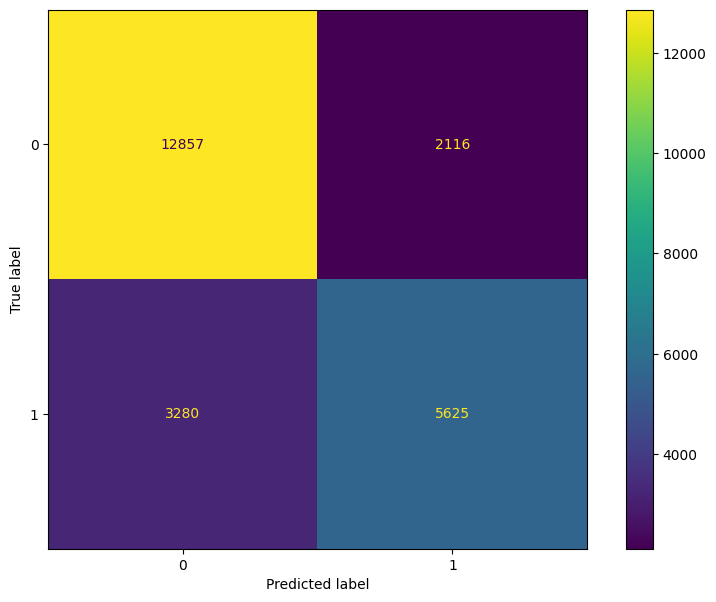

In [ ]:
# 1. Logistic Regression
# the confusion matrix (0 = No, 1 = Yes)
# Hasil dengan Recall
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = search_lr.best_estimator_.predict(X_admit_test)

cm = confusion_matrix(y_admit_test, y_pred, labels=search_lr.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=search_lr.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

Pembacaan klasifikasi confusion-matrix (True-Predict):

**- TP- True Positive (1-1) :** Jumlah kasus yang benar-benar Cancel, dan diprediksi akan Cancel oleh model

**- TN- True Negative (0-0) :** Jumlah kasus yang tidak Cancel, dan diprediksi tidak Cancel juga oleh model

**- FP- False Positive (0-1) :** Jumlah kasus yang sebenarnya tidak Cancel, namun diprediksi akan Cancel oleh model

**- FN- False Negative (1-0) :** Jumlah kasus yang benar-benar Cancel, namun diprediksi tidak Cancel oleh model (model tidak bisa menangkap kasus Cancel)

In [ ]:
# classification report Logistic Regression
from sklearn.metrics import classification_report
y_pred = search_lr.best_estimator_.predict(X_admit_test)
print(classification_report(y_admit_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83     14973
           1       0.73      0.63      0.68      8905

    accuracy                           0.77     23878
   macro avg       0.76      0.75      0.75     23878
weighted avg       0.77      0.77      0.77     23878



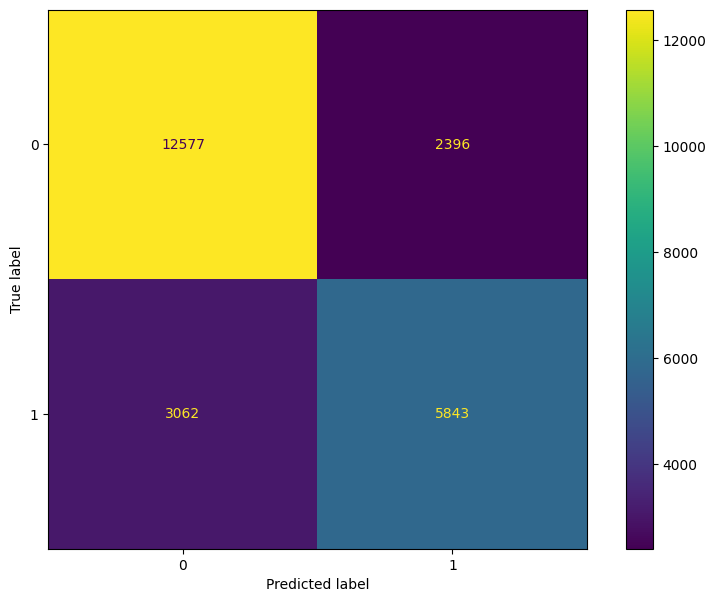

In [ ]:
# 2. Decision Tree
# Hasil dengan Recall
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = search_dt.best_estimator_.predict(X_admit_test)

cm = confusion_matrix(y_admit_test, y_pred, labels=search_dt.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=search_dt.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [ ]:
# classification report Decision Tree
from sklearn.metrics import classification_report
y_pred = search_dt.best_estimator_.predict(X_admit_test)
print(classification_report(y_admit_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82     14973
           1       0.71      0.66      0.68      8905

    accuracy                           0.77     23878
   macro avg       0.76      0.75      0.75     23878
weighted avg       0.77      0.77      0.77     23878



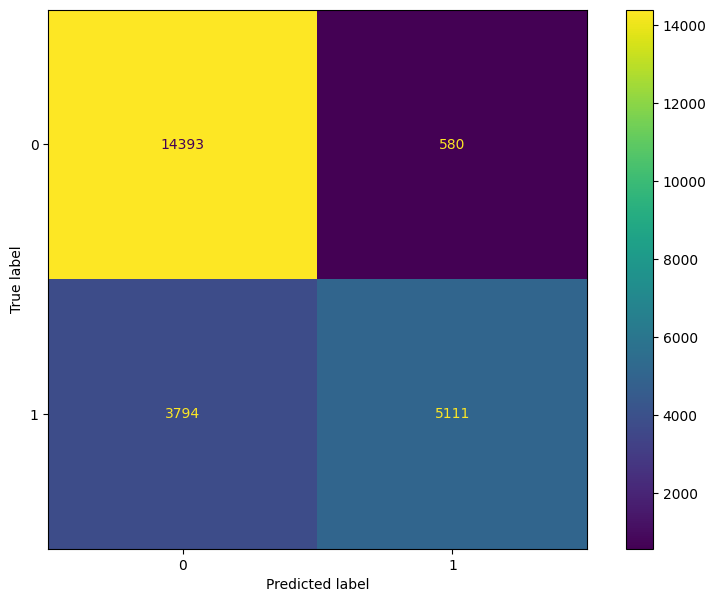

In [ ]:
# 3. Random Forest
# Hasil dengan Recall
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = search_rf.best_estimator_.predict(X_admit_test)

cm = confusion_matrix(y_admit_test, y_pred, labels=search_rf.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=search_rf.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [ ]:
# classification report Random Forest
from sklearn.metrics import classification_report
y_pred = search_rf.best_estimator_.predict(X_admit_test)
print(classification_report(y_admit_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87     14973
           1       0.90      0.57      0.70      8905

    accuracy                           0.82     23878
   macro avg       0.84      0.77      0.78     23878
weighted avg       0.83      0.82      0.81     23878

